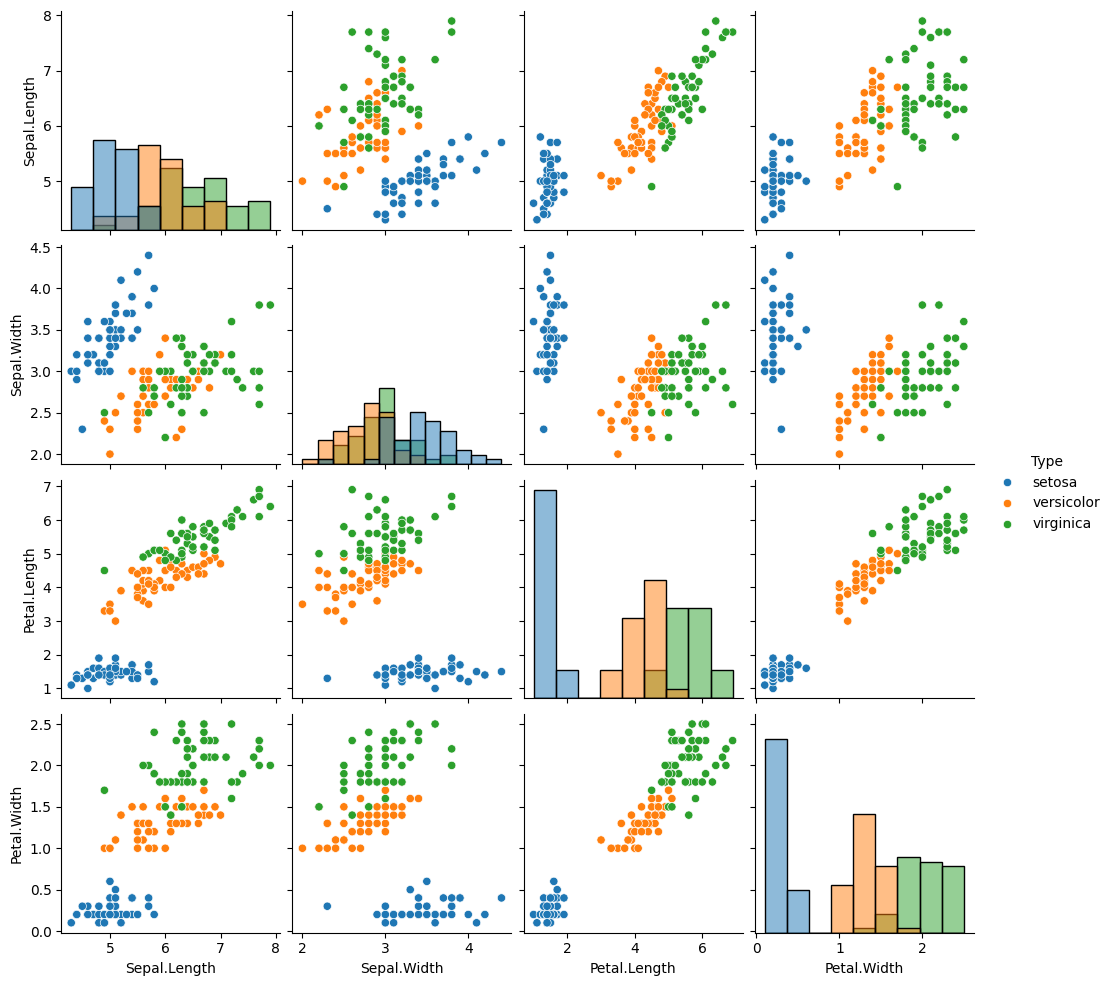

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris_data = pd.read_csv('C:\\Users\\pc\\Desktop\\MSC project\\force-directed-layout-algorithms\\datasets\\iris\\iris.csv')

# Use seaborn's pairplot function to create all the possible scatter plots between the features
sns.pairplot(iris_data, hue="Type", diag_kind="hist")

# To save the figure to your local machine, uncomment the following line:
# plt.savefig('iris_pairplot.png')

# Show the pairplot with all the scatter plots
plt.show()


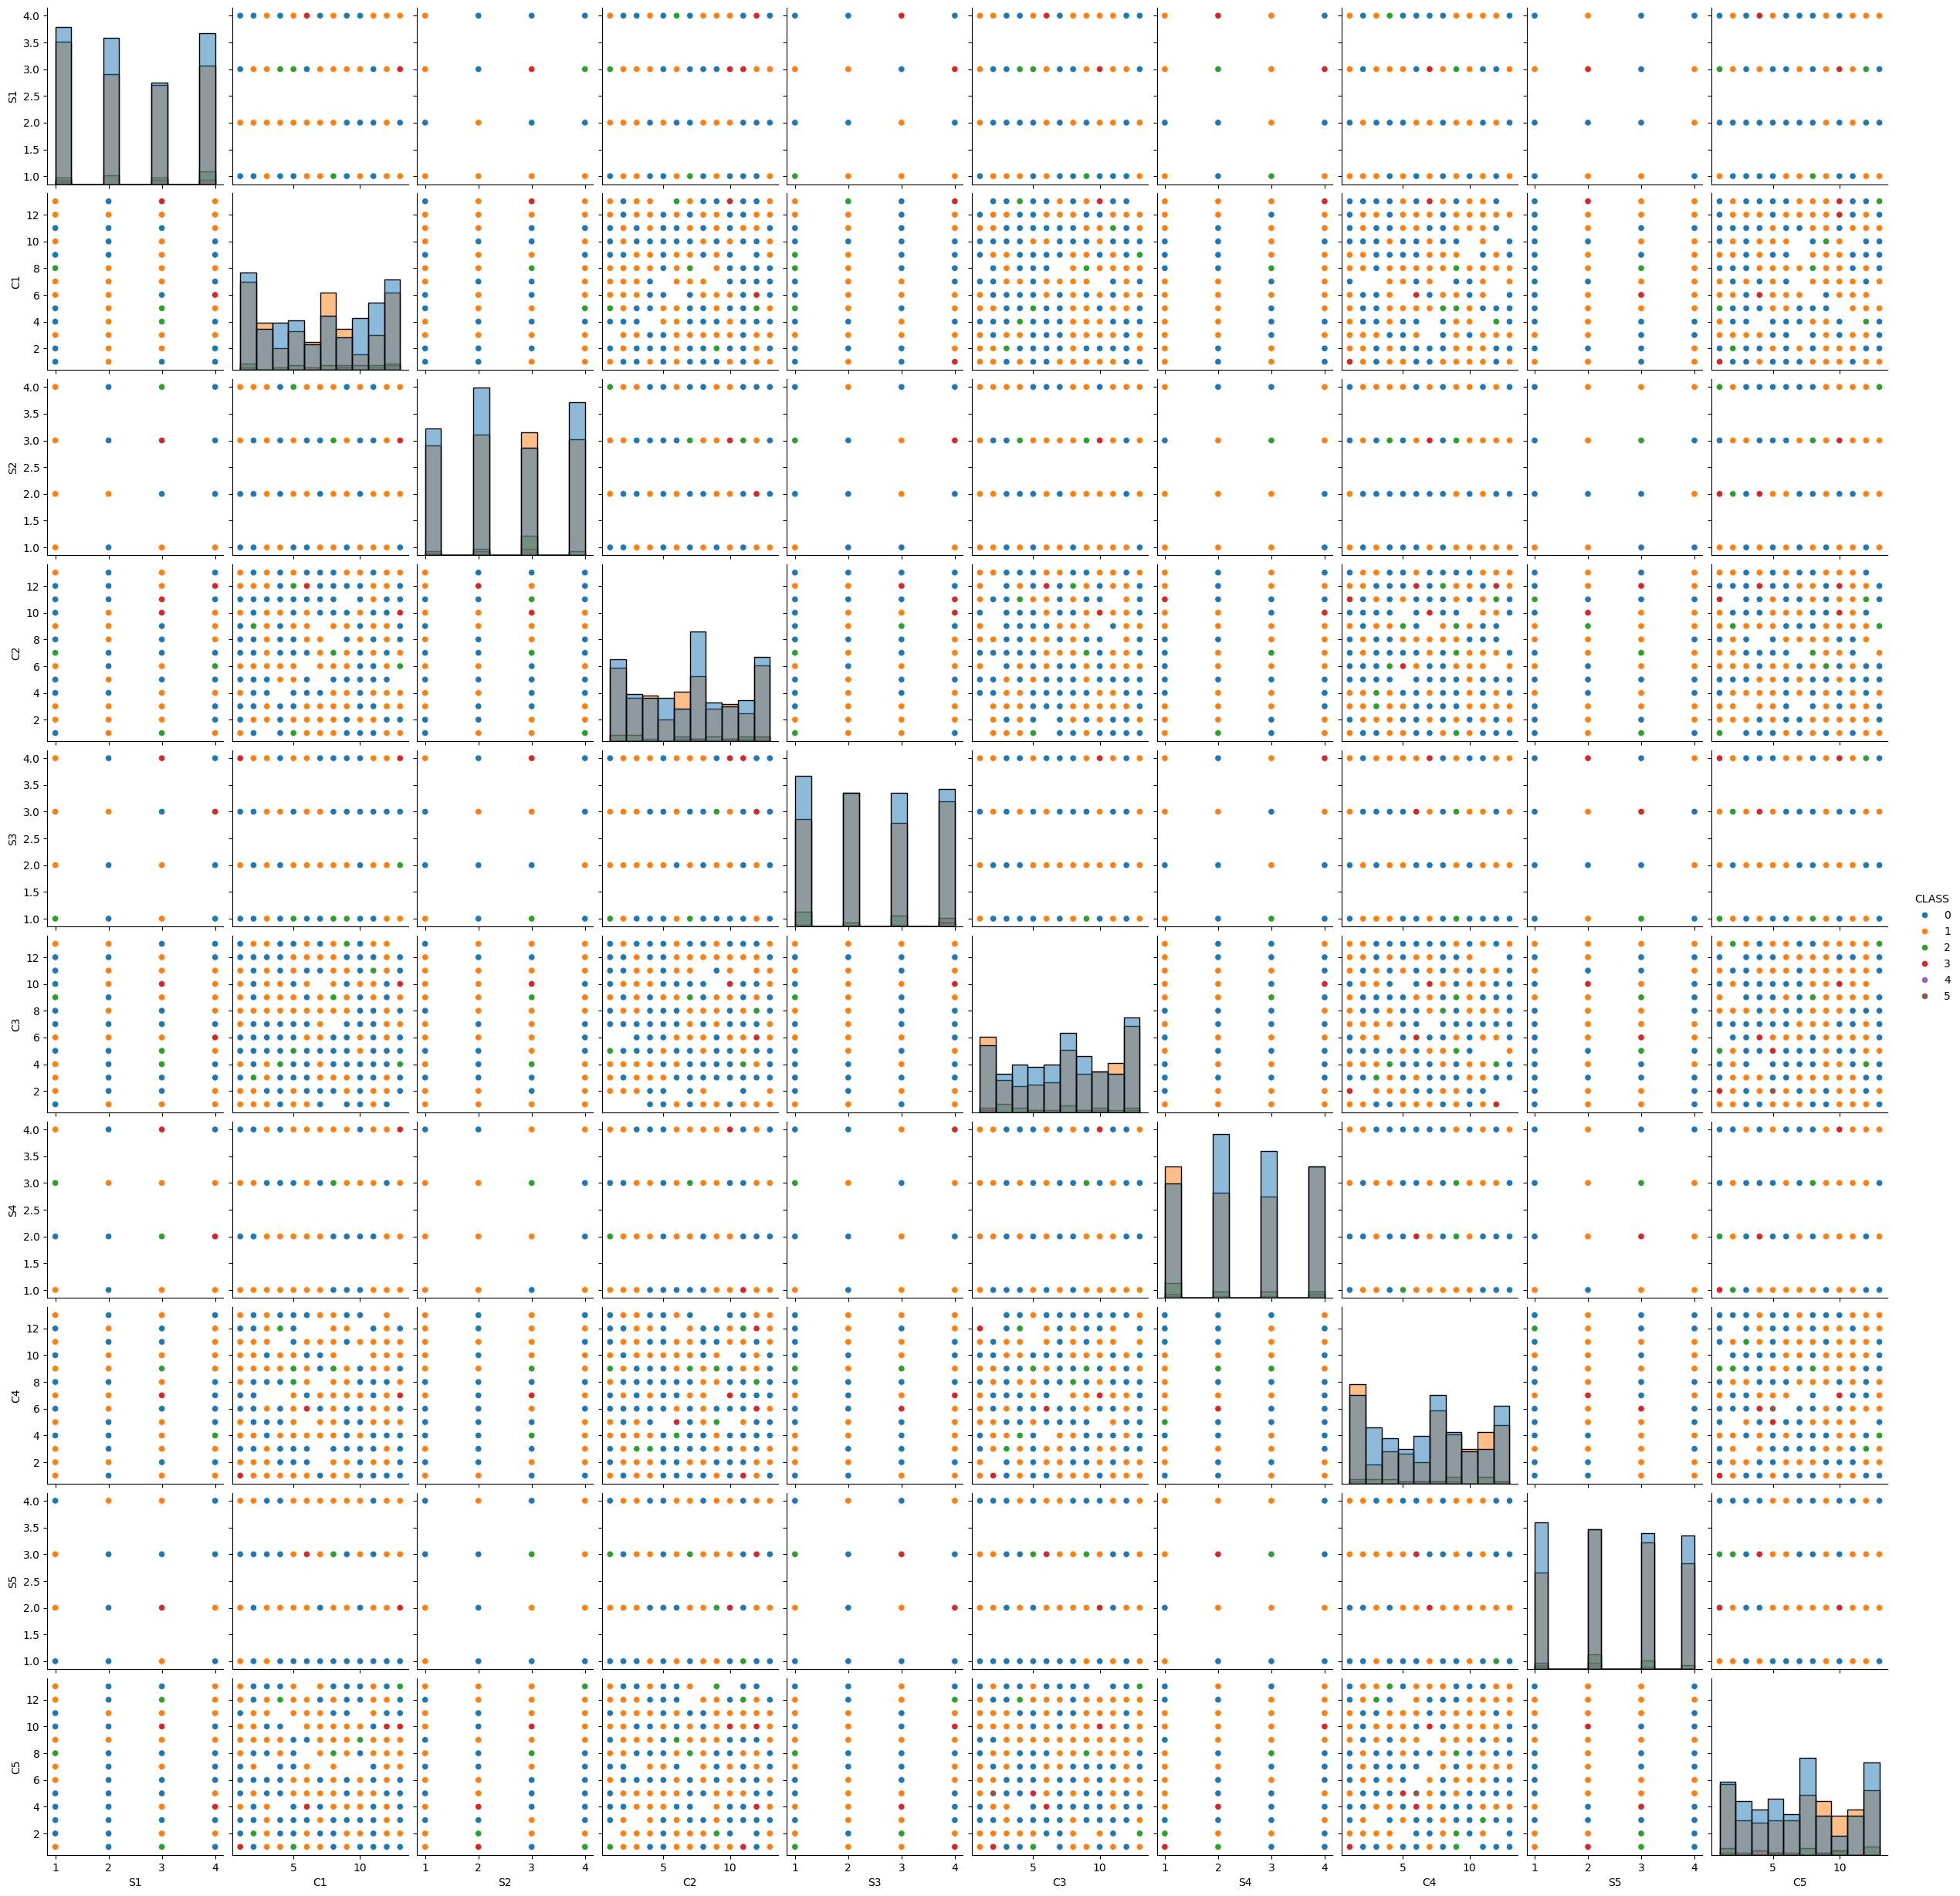

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
poker_data = pd.read_csv('C:\\Users\\pc\\Desktop\\MSC project\\force-directed-layout-algorithms\\datasets\\poker\\poker500.csv')

# Since the sns.pairplot function expects categorical data for hue,
# we should ensure that the 'CLASS' column is of categorical type
poker_data['CLASS'] = poker_data['CLASS'].astype('category')

# Use seaborn's pairplot function to create all the possible scatter plots between the features
sns.pairplot(poker_data, hue="CLASS", diag_kind="hist")

# To save the figure to your local machine, uncomment the following line:
# plt.savefig('/mnt/data/poker_pairplot.png')

# Show the pairplot with all the scatter plots
plt.show()


In [ ]:
pivot

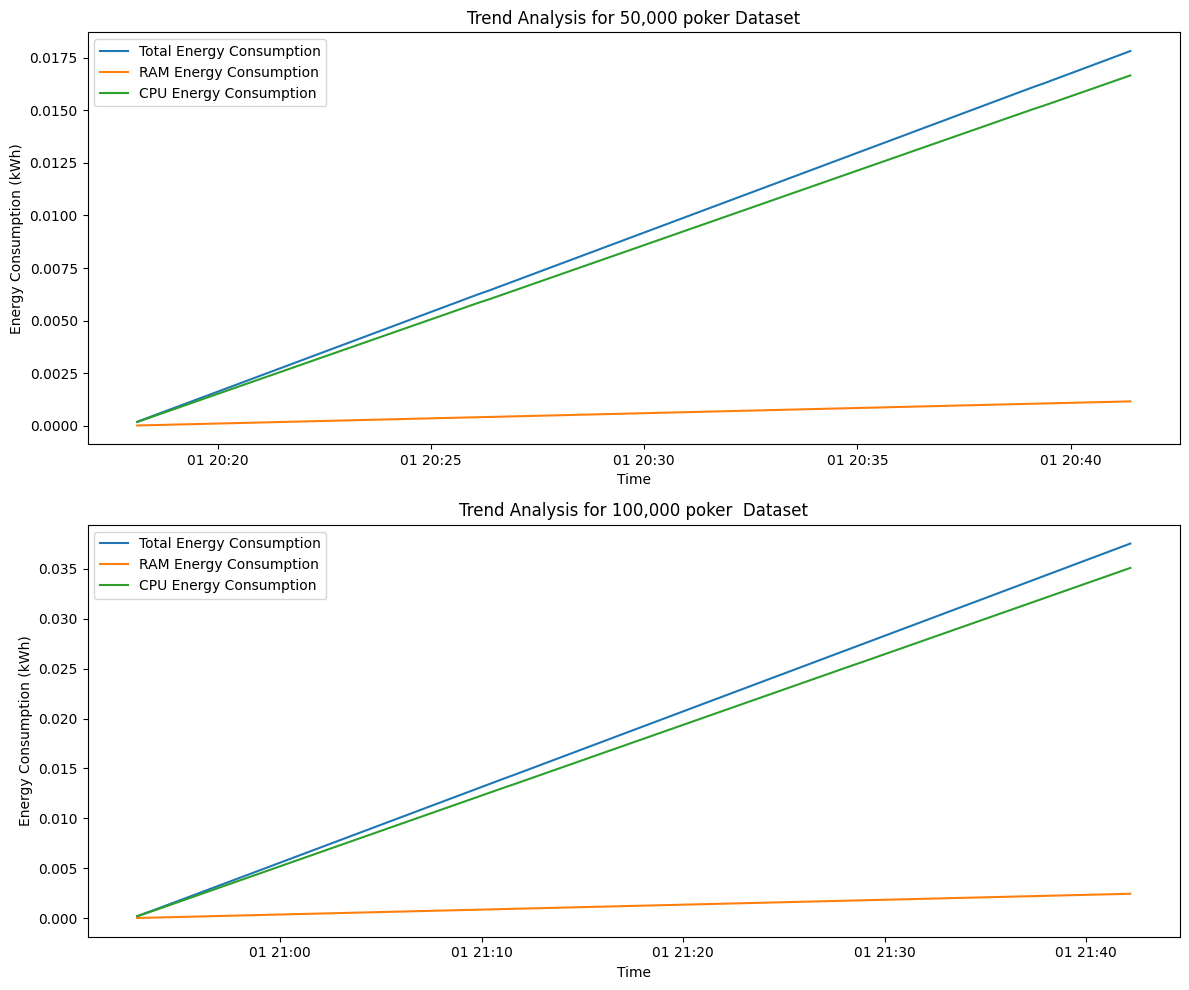

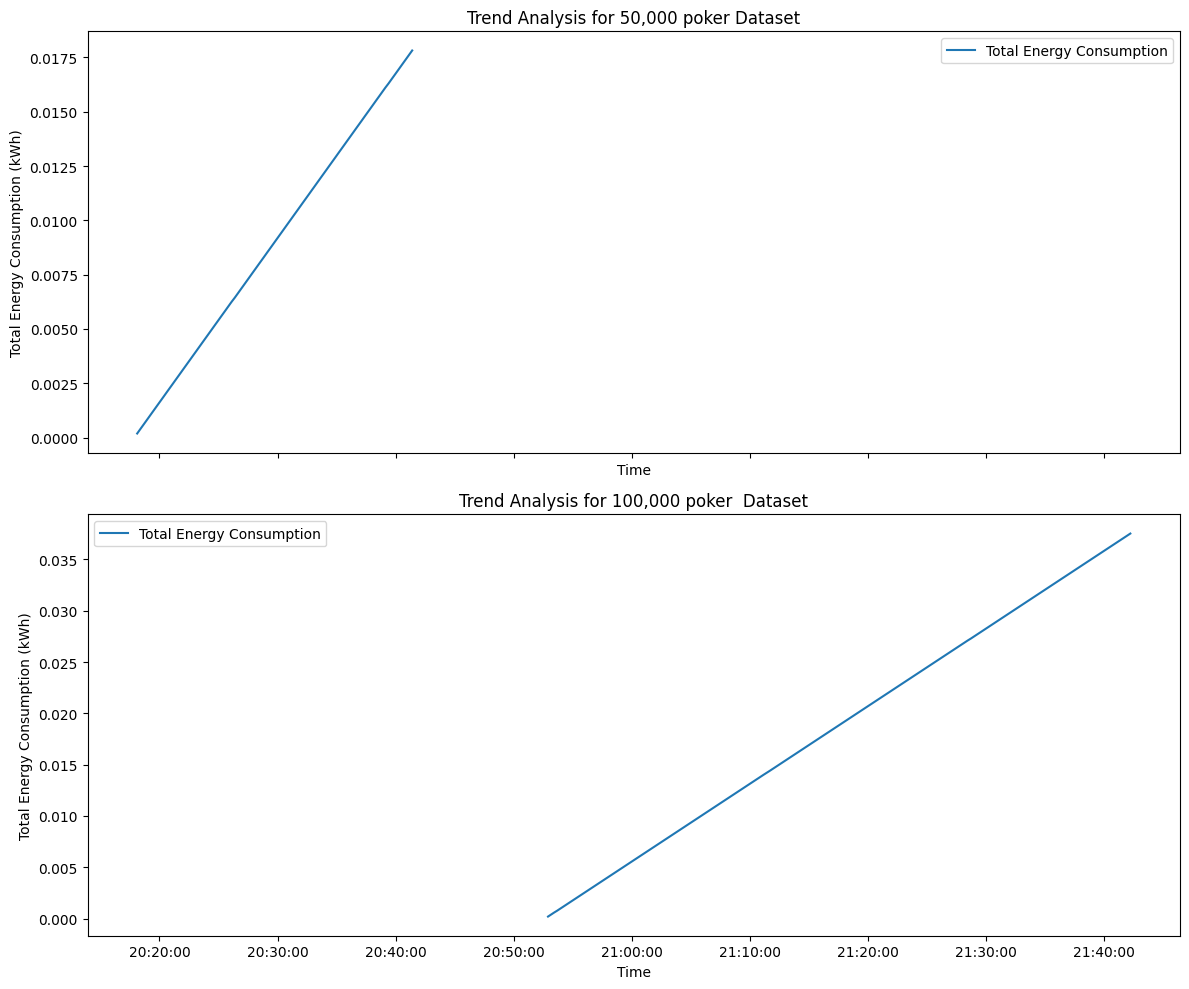

                              OLS Regression Results                             
Dep. Variable:     Cumulative_Energy_kWh   R-squared:                       0.940
Model:                               OLS   Adj. R-squared:                  0.939
Method:                    Least Squares   F-statistic:                     1440.
Date:                   Wed, 06 Dec 2023   Prob (F-statistic):           5.58e-58
Time:                           19:24:10   Log-Likelihood:                 127.38
No. Observations:                     94   AIC:                            -250.8
Df Residuals:                         92   BIC:                            -245.7
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
import re

# Function to parse and prepare your dataset
def load_and_prepare_data(file_path):
    # Load data
    with open(file_path, 'r') as file:
        log_data = file.read()

    # Extract relevant data using regular expressions
    pattern = r'\[codecarbon INFO @ (\d{2}:\d{2}:\d{2})\] Energy consumed for RAM : ([\d\.]+) kWh. RAM Power : ([\d\.]+) W\n\[codecarbon INFO @ \d{2}:\d{2}:\d{2}\] Energy consumed for all CPUs : ([\d\.]+) kWh. Total CPU Power : ([\d\.]+) W'
    matches = re.findall(pattern, log_data)

    # Convert to DataFrame
    df = pd.DataFrame(matches, columns=['Time', 'Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W'])
    df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']] = df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']].astype(float)
    
    # Convert 'Time' to datetime
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
    
    return df

# Load your datasets
your_data_1 = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/pivot50k.txt')
your_data_2 = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/pivot100k.txt')

# Trend Analysis
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

titles = ['Trend Analysis for 50,000 poker Dataset', 'Trend Analysis for 100,000 poker  Dataset']

for i, df in enumerate([your_data_1, your_data_2]):
    df['Total_Energy_kWh'] = df['Energy_RAM_kWh'] + df['Energy_CPU_kWh']
    
    axes[i].plot(df['Time'], df['Total_Energy_kWh'], label='Total Energy Consumption')
    axes[i].plot(df['Time'], df['Energy_RAM_kWh'], label='RAM Energy Consumption')
    axes[i].plot(df['Time'], df['Energy_CPU_kWh'], label='CPU Energy Consumption')
    
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Energy Consumption (kWh)')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Time-Based Analysis
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
time_format = mdates.DateFormatter('%H:%M:%S')

for i, df in enumerate([your_data_1, your_data_2]):
    axes[i].plot(df['Time'], df['Total_Energy_kWh'], label='Total Energy Consumption')
    axes[i].xaxis.set_major_formatter(time_format)
    
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Total Energy Consumption (kWh)')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Statistical Analysis
def perform_statistical_analysis(df):
    df['Cumulative_Energy_kWh'] = df['Total_Energy_kWh'].cumsum()
    df['Time_Seconds'] = (df['Time'] - df['Time'].min()).dt.total_seconds()
    
    X = sm.add_constant(df['Time_Seconds'])
    y = df['Cumulative_Energy_kWh']
    model = sm.OLS(y, X).fit()
    
    return model.summary()

summary_1 = perform_statistical_analysis(your_data_1)
summary_2 = perform_statistical_analysis(your_data_2)

print(summary_1)
print(summary_2)


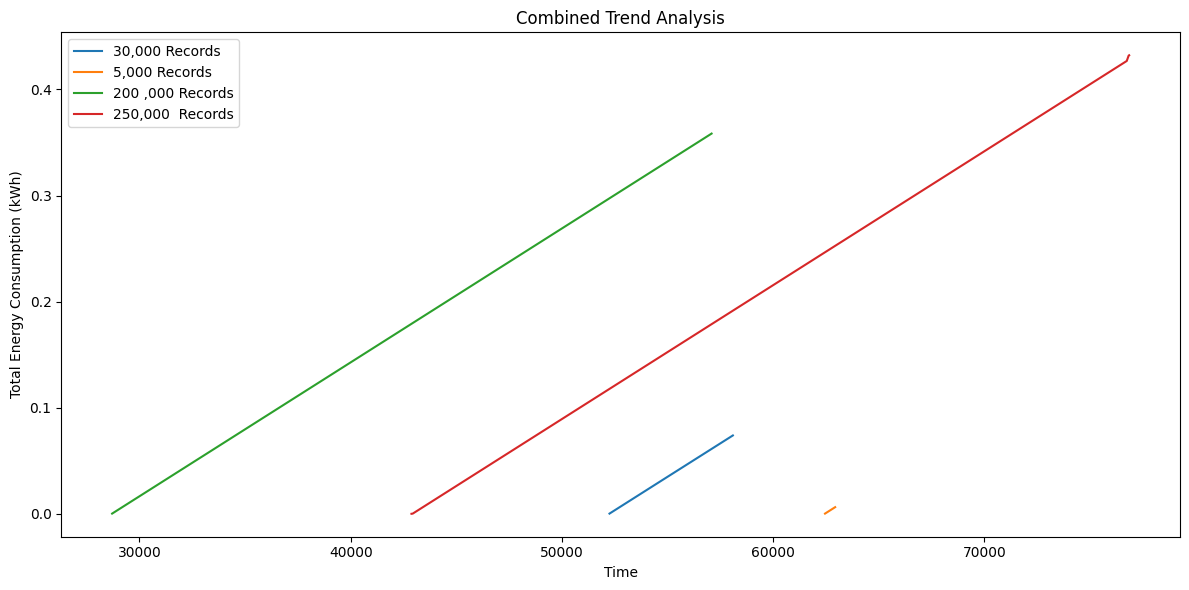

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
import re

def load_and_prepare_data(file_path):
    # Load data
    with open(file_path, 'r') as file:
        log_data = file.read()

    # Extract relevant data using regular expressions
    pattern = r'\[codecarbon INFO @ (\d{2}:\d{2}:\d{2})\] Energy consumed for RAM : ([\d\.]+) kWh. RAM Power : ([\d\.]+) W\n\[codecarbon INFO @ \d{2}:\d{2}:\d{2}\] Energy consumed for all CPUs : ([\d\.]+) kWh. Total CPU Power : ([\d\.]+) W'
    matches = re.findall(pattern, log_data)

    # Convert to DataFrame
    df = pd.DataFrame(matches, columns=['Time', 'Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W'])
    df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']] = df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']].astype(float)
    
    # Convert 'Time' to datetime
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

    # Convert 'Time' to seconds since start of day
    df['Time_in_seconds'] = df['Time'].dt.hour * 3600 + df['Time'].dt.minute * 60 + df['Time'].dt.second
    
    return df


# Load your datasets
your_data_1 = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/poker 30,000.txt')
your_data_2 = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/poker5000.txt')
your_data_3 = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/poker2lakh.txt')
your_data_4 = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/poker2.5lakhs.txt')

# Combined Trend Analysis for all datasets
fig, ax = plt.subplots(figsize=(12, 6))

# Calculate total energy for all datasets and plot
for data, label in zip([your_data_1, your_data_2, your_data_3, your_data_4], 
                       ['30,000 Records', '5,000 Records', '200 ,000 Records', '250,000  Records']):
    data['Total_Energy_kWh'] = data['Energy_RAM_kWh'] + data['Energy_CPU_kWh']
    # Use 'Time_in_seconds' for plotting
    ax.plot(data['Time_in_seconds'], data['Total_Energy_kWh'], label=label)


ax.set_title('Combined Trend Analysis')
ax.set_xlabel('Time')
ax.set_ylabel('Total Energy Consumption (kWh)')
ax.legend()
plt.tight_layout()
plt.show()

# ... [Rest of your code for statistical analysis and efficiency ratio] ...


In [ ]:
chlamers96

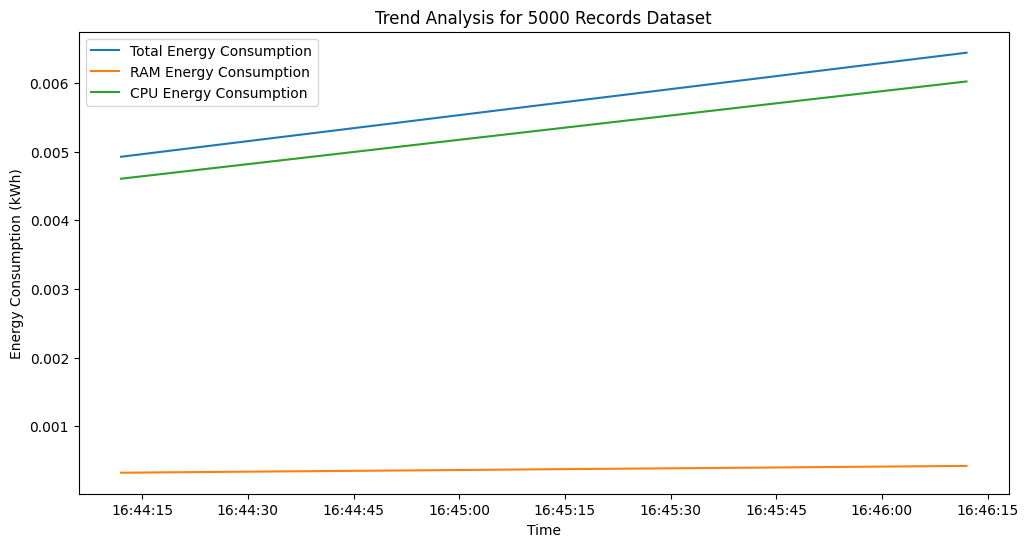

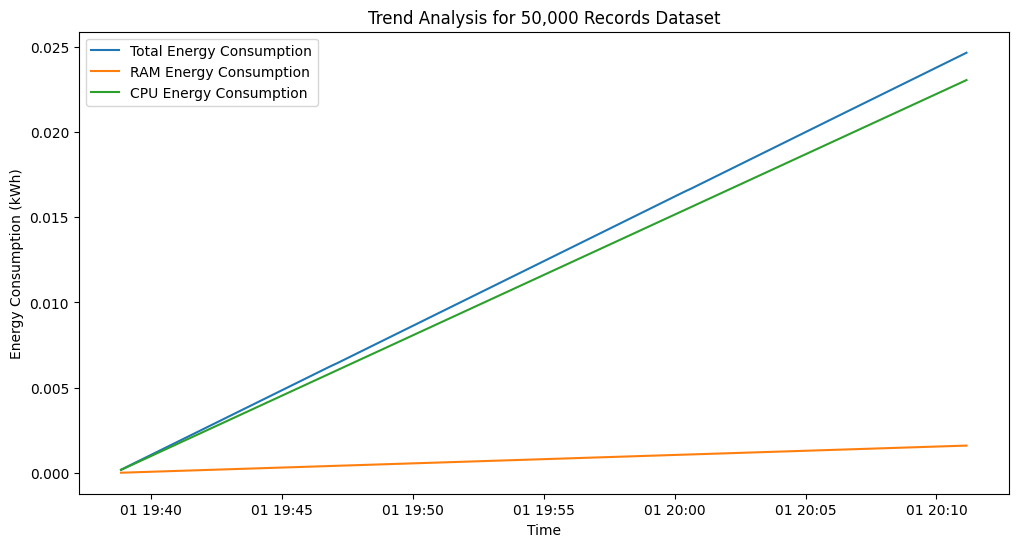

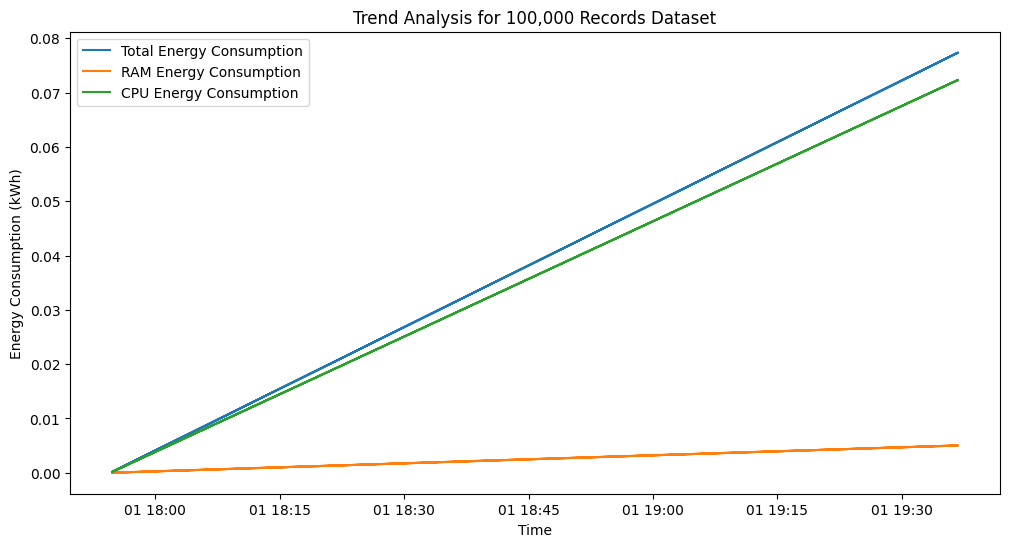

                              OLS Regression Results                             
Dep. Variable:     Cumulative_Energy_kWh   R-squared:                       0.999
Model:                               OLS   Adj. R-squared:                  0.998
Method:                    Least Squares   F-statistic:                     5067.
Date:                   Wed, 06 Dec 2023   Prob (F-statistic):           2.84e-11
Time:                           18:36:24   Log-Likelihood:                 54.702
No. Observations:                      9   AIC:                            -105.4
Df Residuals:                          7   BIC:                            -105.0
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0

C:\Users\pc\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


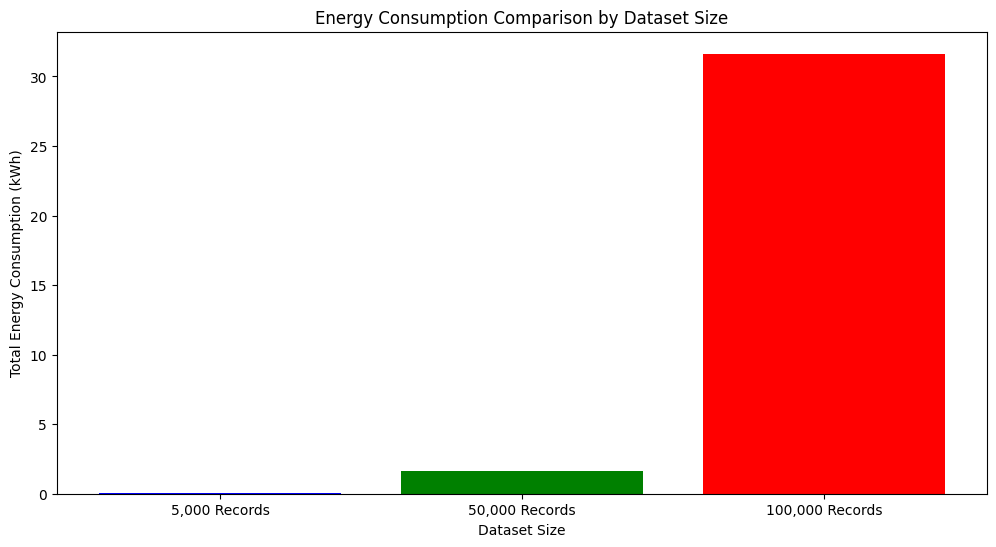

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
import re

# Function to parse and prepare your dataset
def load_and_prepare_data(file_path):
    with open(file_path, 'r') as file:
        log_data = file.read()

    pattern = r'\[codecarbon INFO @ (\d{2}:\d{2}:\d{2})\] Energy consumed for RAM : ([\d\.]+) kWh. RAM Power : ([\d\.]+) W\n\[codecarbon INFO @ \d{2}:\d{2}:\d{2}\] Energy consumed for all CPUs : ([\d\.]+) kWh. Total CPU Power : ([\d\.]+) W'
    matches = re.findall(pattern, log_data)

    df = pd.DataFrame(matches, columns=['Time', 'Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W'])
    df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']] = df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']].astype(float)
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
    
    return df

# Load your datasets
your_data_1 = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/poker 30,000.txt')
your_data_2 = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/poker5000.txt')
your_data_3 = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/poker2lakh.txt')
your_data_4 = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/poker2.5lakhs.txt')

# Trend Analysis Function
def trend_analysis(df, title):
    fig, ax = plt.subplots(figsize=(12, 6))
    df['Total_Energy_kWh'] = df['Energy_RAM_kWh'] + df['Energy_CPU_kWh']
    ax.plot(df['Time'], df['Total_Energy_kWh'], label='Total Energy Consumption')
    ax.plot(df['Time'], df['Energy_RAM_kWh'], label='RAM Energy Consumption')
    ax.plot(df['Time'], df['Energy_CPU_kWh'], label='CPU Energy Consumption')
    ax.set_title(title)
    ax.set_xlabel('Time')
    ax.set_ylabel('Energy Consumption (kWh)')
    ax.legend()
    plt.show()

# Perform Trend Analysis for each dataset
trend_analysis(your_data_1, 'Trend Analysis for 30,000 Records Dataset')
trend_analysis(your_data_2, 'Trend Analysis for 5,000 Records Dataset')
trend_analysis(your_data_3, 'Trend Analysis for 200,000 Records Dataset')
trend_analysis(your_data_4, 'Trend Analysis for 250,000  Records Dataset')

# Statistical Analysis Function
def perform_statistical_analysis(df):
    df['Cumulative_Energy_kWh'] = df['Total_Energy_kWh'].cumsum()
    df['Time_Seconds'] = (df['Time'] - df['Time'].min()).dt.total_seconds()
    X = sm.add_constant(df['Time_Seconds'])
    y = df['Cumulative_Energy_kWh']
    model = sm.OLS(y, X).fit()
    return model.summary()

# Perform Statistical Analysis for each dataset
summary_1 = perform_statistical_analysis(your_data_1)
summary_2 = perform_statistical_analysis(your_data_2)
summary_3 = perform_statistical_analysis(your_data_3)
summary_4 = perform_statistical_analysis(your_data_4)

# Print summaries
print(summary_1)
print(summary_2)
print(summary_3)
print(summary_4)

# Bar Graph Comparison
def calculate_total_energy(df):
    return df['Total_Energy_kWh'].sum()

datasets = ['5,000 Records', '30,000 Records', '2 Lakh Records', '2.5 Lakh Records']
total_energy = [calculate_total_energy(df) for df in [your_data_2, your_data_1, your_data_3, your_data_4]]

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(datasets, total_energy, color=['blue', 'green', 'red', 'purple'])
ax.set_xlabel('Dataset Size')
ax.set_ylabel('Total Energy Consumption (kWh)')
ax.set_title('Energy Consumption Comparison by Dataset Size')
plt.show()


In [ ]:
hybrid

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
import re

# Function to parse and prepare your dataset
def load_and_prepare_data(file_path):
    with open(file_path, 'r') as file:
        log_data = file.read()

    pattern = r'\[codecarbon INFO @ (\d{2}:\d{2}:\d{2})\] Energy consumed for RAM : ([\d\.]+) kWh. RAM Power : ([\d\.]+) W\n\[codecarbon INFO @ \d{2}:\d{2}:\d{2}\] Energy consumed for all CPUs : ([\d\.]+) kWh. Total CPU Power : ([\d\.]+) W'
    matches = re.findall(pattern, log_data)

    df = pd.DataFrame(matches, columns=['Time', 'Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W'])
    df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']] = df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']].astype(float)
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
    
    return df

# Load your datasets
your_data_1 = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/0.7hybrid5k.txt')
your_data_2 = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/hybrid50k.txt')
your_data_3 = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/hybrid100k.txt')


# Trend Analysis Function
def trend_analysis(df, title):
    fig, ax = plt.subplots(figsize=(12, 6))
    df['Total_Energy_kWh'] = df['Energy_RAM_kWh'] + df['Energy_CPU_kWh']
    ax.plot(df['Time'], df['Total_Energy_kWh'], label='Total Energy Consumption')
    ax.plot(df['Time'], df['Energy_RAM_kWh'], label='RAM Energy Consumption')
    ax.plot(df['Time'], df['Energy_CPU_kWh'], label='CPU Energy Consumption')
    ax.set_title(title)
    ax.set_xlabel('Time')
    ax.set_ylabel('Energy Consumption (kWh)')
    ax.legend()
    plt.show()

# Perform Trend Analysis for each dataset
trend_analysis(your_data_1, 'Trend Analysis for 5000 Records Dataset')
trend_analysis(your_data_2, 'Trend Analysis for 50,000 Records Dataset')
trend_analysis(your_data_3, 'Trend Analysis for 100,000 Records Dataset')


# Statistical Analysis Function
def perform_statistical_analysis(df):
    df['Cumulative_Energy_kWh'] = df['Total_Energy_kWh'].cumsum()
    df['Time_Seconds'] = (df['Time'] - df['Time'].min()).dt.total_seconds()
    X = sm.add_constant(df['Time_Seconds'])
    y = df['Cumulative_Energy_kWh']
    model = sm.OLS(y, X).fit()
    return model.summary()

# Perform Statistical Analysis for each dataset
summary_1 = perform_statistical_analysis(your_data_1)
summary_2 = perform_statistical_analysis(your_data_2)
summary_3 = perform_statistical_analysis(your_data_3)


# Print summaries
print(summary_1)
print(summary_2)
print(summary_3)


# Bar Graph Comparison
def calculate_total_energy(df):
    return df['Total_Energy_kWh'].sum()

datasets = ['5,000 Records', '50,000 Records', '100,000 Records']
total_energy = [calculate_total_energy(df) for df in [your_data_1, your_data_2, your_data_3]]

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(datasets, total_energy, color=['blue', 'green', 'red', 'purple'])
ax.set_xlabel('Dataset Size')
ax.set_ylabel('Total Energy Consumption (kWh)')
ax.set_title('Energy Consumption Comparison by Dataset Size')
plt.show()


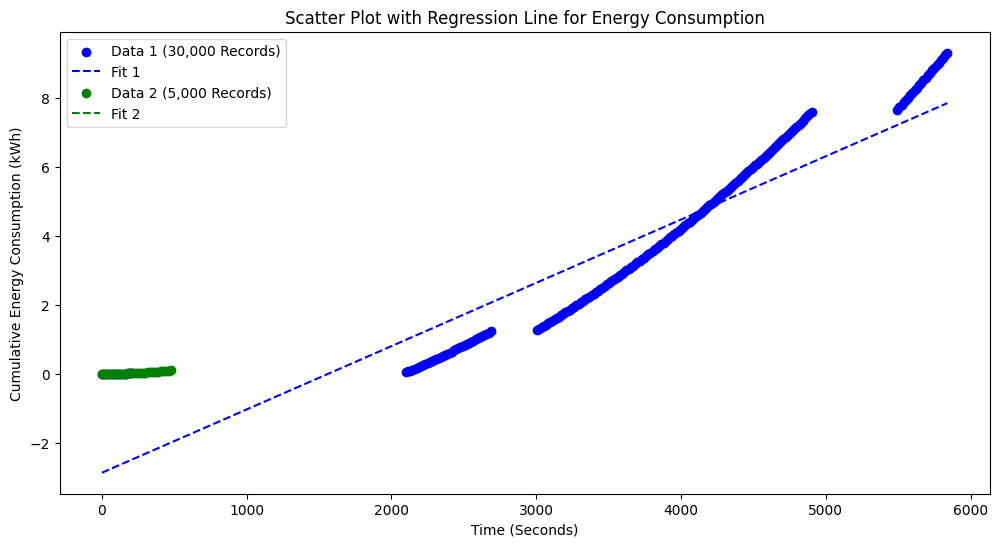

                              OLS Regression Results                             
Dep. Variable:     Cumulative_Energy_kWh   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1063.
Date:                   Wed, 06 Dec 2023   Prob (F-statistic):           7.59e-83
Time:                           16:27:27   Log-Likelihood:                -315.76
No. Observations:                    206   AIC:                             635.5
Df Residuals:                        204   BIC:                             642.2
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

# Assuming your_data_1 and your_data_2 are already loaded and prepared
# Function to perform linear regression and return data for scatter plot
def prepare_scatter_data(df):
    df['Cumulative_Energy_kWh'] = df['Total_Energy_kWh'].cumsum()
    df['Time_Seconds'] = (df['Time'] - df['Time'].min()).dt.total_seconds()
    X = sm.add_constant(df['Time_Seconds'])
    y = df['Cumulative_Energy_kWh']
    model = sm.OLS(y, X).fit()
    df['Fitted_Value'] = model.predict(X)
    return df, model

# Prepare data for scatter plot with regression line
scatter_data_1, model_1 = prepare_scatter_data(your_data_1)
scatter_data_2, model_2 = prepare_scatter_data(your_data_2)

# Plotting scatter plot with regression line
plt.figure(figsize=(12, 6))

plt.scatter(scatter_data_1['Time_Seconds'], scatter_data_1['Cumulative_Energy_kWh'], color='blue', label='Data 1 (30,000 Records)')
plt.plot(scatter_data_1['Time_Seconds'], scatter_data_1['Fitted_Value'], color='blue', linestyle='--', label='Fit 1')

plt.scatter(scatter_data_2['Time_Seconds'], scatter_data_2['Cumulative_Energy_kWh'], color='green', label='Data 2 (5,000 Records)')
plt.plot(scatter_data_2['Time_Seconds'], scatter_data_2['Fitted_Value'], color='green', linestyle='--', label='Fit 2')

plt.title('Scatter Plot with Regression Line for Energy Consumption')
plt.xlabel('Time (Seconds)')
plt.ylabel('Cumulative Energy Consumption (kWh)')
plt.legend()
plt.show()

# Print model summaries
print(model_1.summary())
print(model_2.summary())


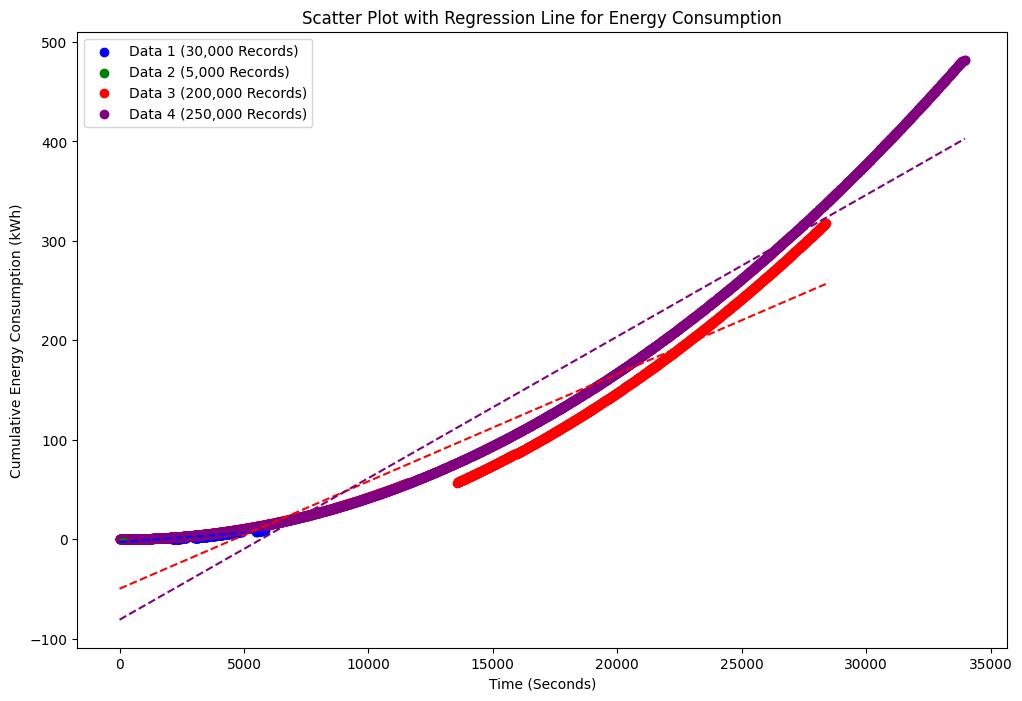

                              OLS Regression Results                             
Dep. Variable:     Cumulative_Energy_kWh   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1063.
Date:                   Wed, 06 Dec 2023   Prob (F-statistic):           7.59e-83
Time:                           16:38:44   Log-Likelihood:                -315.76
No. Observations:                    206   AIC:                             635.5
Df Residuals:                        204   BIC:                             642.2
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import re

def load_and_prepare_data(file_path):
    with open(file_path, 'r') as file:
        log_data = file.read()

    pattern = r'\[codecarbon INFO @ (\d{2}:\d{2}:\d{2})\] Energy consumed for RAM : ([\d\.]+) kWh. RAM Power : ([\d\.]+) W\n\[codecarbon INFO @ \d{2}:\d{2}:\d{2}\] Energy consumed for all CPUs : ([\d\.]+) kWh. Total CPU Power : ([\d\.]+) W'
    matches = re.findall(pattern, log_data)

    df = pd.DataFrame(matches, columns=['Time', 'Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W'])
    df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']] = df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']].astype(float)
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
    df['Total_Energy_kWh'] = df['Energy_RAM_kWh'] + df['Energy_CPU_kWh']  # Calculate Total Energy Consumption
    return df

# Load your datasets
your_data_1 = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/poker 30,000.txt')
your_data_2 = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/poker5000.txt')
your_data_3 = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/poker2lakh.txt')
your_data_4 = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/poker2.5lakhs.txt')



# Function to perform linear regression and return data for scatter plot
def prepare_scatter_data(df):
    df['Cumulative_Energy_kWh'] = df['Total_Energy_kWh'].cumsum()
    df['Time_Seconds'] = (df['Time'] - df['Time'].min()).dt.total_seconds()
    X = sm.add_constant(df['Time_Seconds'])
    y = df['Cumulative_Energy_kWh']
    model = sm.OLS(y, X).fit()
    df['Fitted_Value'] = model.predict(X)
    return df, model

# Prepare data for scatter plot with regression line
scatter_data_1, model_1 = prepare_scatter_data(your_data_1)
scatter_data_2, model_2 = prepare_scatter_data(your_data_2)
scatter_data_3, model_3 = prepare_scatter_data(your_data_3)
scatter_data_4, model_4 = prepare_scatter_data(your_data_4)

# Plotting scatter plot with regression line
plt.figure(figsize=(12, 8))

plt.scatter(scatter_data_1['Time_Seconds'], scatter_data_1['Cumulative_Energy_kWh'], color='blue', label='Data 1 (30,000 Records)')
plt.plot(scatter_data_1['Time_Seconds'], scatter_data_1['Fitted_Value'], color='blue', linestyle='--')

plt.scatter(scatter_data_2['Time_Seconds'], scatter_data_2['Cumulative_Energy_kWh'], color='green', label='Data 2 (5,000 Records)')
plt.plot(scatter_data_2['Time_Seconds'], scatter_data_2['Fitted_Value'], color='green', linestyle='--')

plt.scatter(scatter_data_3['Time_Seconds'], scatter_data_3['Cumulative_Energy_kWh'], color='red', label='Data 3 (200,000 Records)')
plt.plot(scatter_data_3['Time_Seconds'], scatter_data_3['Fitted_Value'], color='red', linestyle='--')

plt.scatter(scatter_data_4['Time_Seconds'], scatter_data_4['Cumulative_Energy_kWh'], color='purple', label='Data 4 (250,000 Records)')
plt.plot(scatter_data_4['Time_Seconds'], scatter_data_4['Fitted_Value'], color='purple', linestyle='--')

plt.title('Scatter Plot with Regression Line for Energy Consumption')
plt.xlabel('Time (Seconds)')
plt.ylabel('Cumulative Energy Consumption (kWh)')
plt.legend()
plt.show()

# Print model summaries
print(model_1.summary())
print(model_2.summary())
print(model_3.summary())
print(model_4.summary())


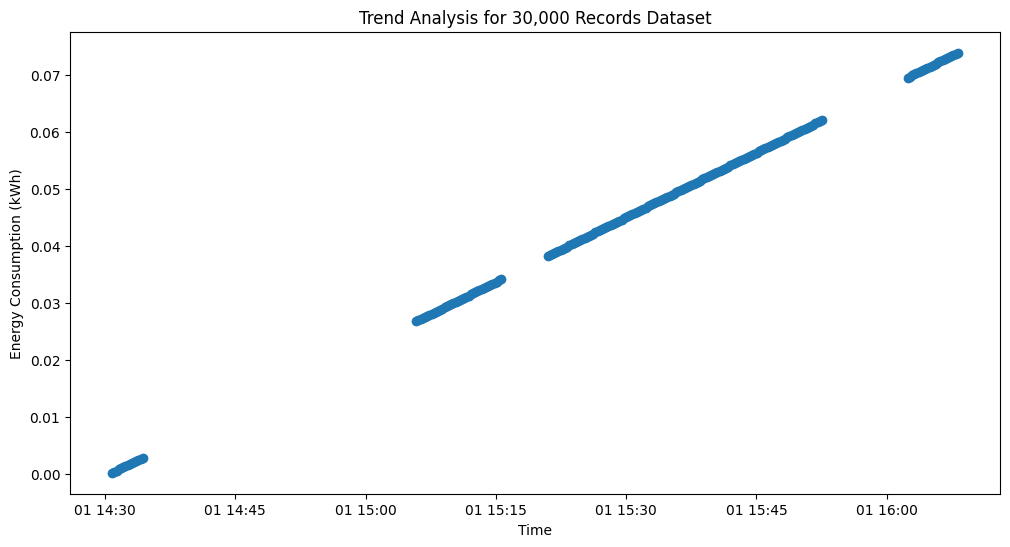

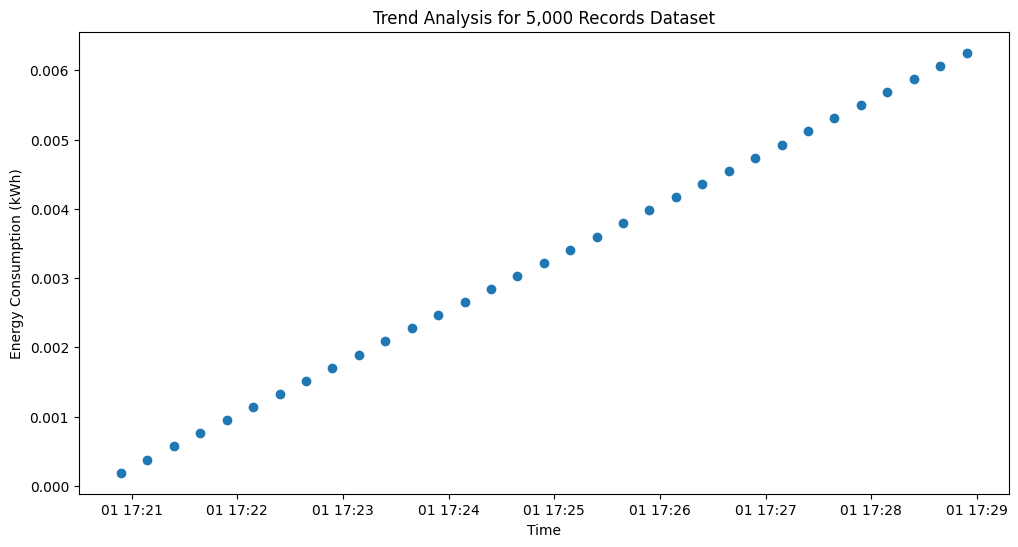

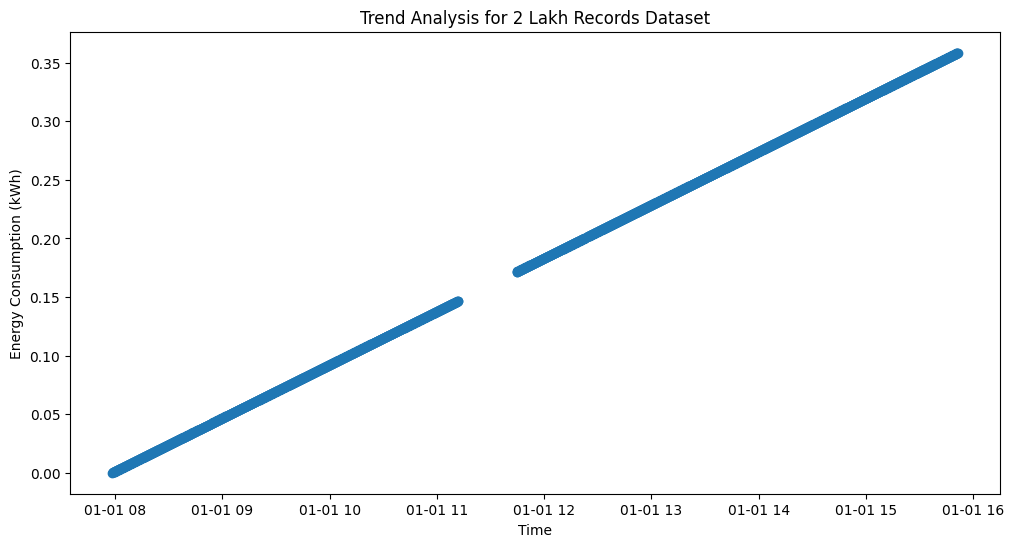

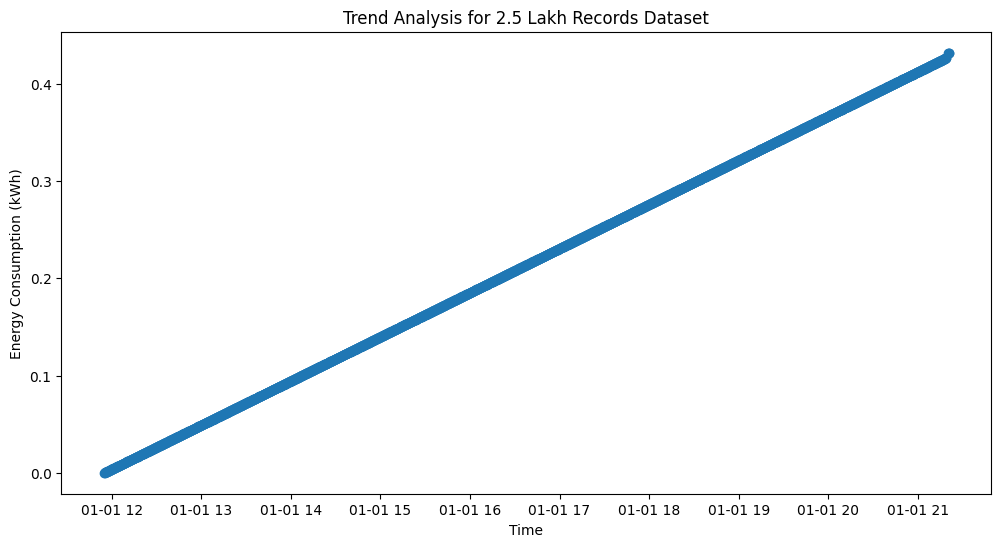

R-squared for Dataset 1: 0.8390003446879998
R-squared for Dataset 2: 0.9442519181567177
R-squared for Dataset 3: 0.9216658363025643
R-squared for Dataset 4: 0.9374943306122228
Efficiency Ratio for Dataset 1: 0.0015959876712328767
Efficiency Ratio for Dataset 2: 0.00022149375
Efficiency Ratio for Dataset 3: 0.01119793029811826
Efficiency Ratio for Dataset 4: 0.014190929357744157


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
import re

def load_and_prepare_data(file_path):
    # Load data
    with open(file_path, 'r') as file:
        log_data = file.read()

    # Extract relevant data using regular expressions
    pattern = r'\[codecarbon INFO @ (\d{2}:\d{2}:\d{2})\] Energy consumed for RAM : ([\d\.]+) kWh. RAM Power : ([\d\.]+) W\n\[codecarbon INFO @ \d{2}:\d{2}:\d{2}\] Energy consumed for all CPUs : ([\d\.]+) kWh. Total CPU Power : ([\d\.]+) W'
    matches = re.findall(pattern, log_data)

    # Convert to DataFrame
    df = pd.DataFrame(matches, columns=['Time', 'Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W'])
    df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']] = df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']].astype(float)
    
    # Convert 'Time' to datetime
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
    
    return df

# Load your datasets
your_data_1 = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/poker 30,000.txt')
your_data_2 = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/poker5000.txt')
your_data_3 = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/poker2lakh.txt')
your_data_4 = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/poker2.5lakhs.txt')

# Function to perform trend analysis
def trend_analysis(df, title):
    fig, ax = plt.subplots(figsize=(12, 6))
    df['Total_Energy_kWh'] = df['Energy_RAM_kWh'] + df['Energy_CPU_kWh']
    ax.scatter(df['Time'], df['Total_Energy_kWh'], label='Total Energy Consumption')
    ax.set_title(title)
    ax.set_xlabel('Time')
    ax.set_ylabel('Energy Consumption (kWh)')
    plt.show()

# Perform trend analysis for each dataset
trend_analysis(your_data_1, 'Trend Analysis for 30,000 Records Dataset')
trend_analysis(your_data_2, 'Trend Analysis for 5,000 Records Dataset')
trend_analysis(your_data_3, 'Trend Analysis for 2 Lakh Records Dataset')
trend_analysis(your_data_4, 'Trend Analysis for 2.5 Lakh Records Dataset')

# Function to perform statistical analysis
def perform_statistical_analysis(df):
    df['Cumulative_Energy_kWh'] = df['Total_Energy_kWh'].cumsum()
    df['Time_Seconds'] = (df['Time'] - df['Time'].min()).dt.total_seconds()
    X = sm.add_constant(df['Time_Seconds'])
    y = df['Cumulative_Energy_kWh']
    model = sm.OLS(y, X).fit()
    return model

# Perform and print statistical analysis for each dataset
models = [perform_statistical_analysis(df) for df in [your_data_1, your_data_2, your_data_3, your_data_4]]
for i, model in enumerate(models, start=1):
    print(f'R-squared for Dataset {i}: {model.rsquared}')

# Calculate and print efficiency ratio for each dataset
efficiency_ratios = [df['Total_Energy_kWh'].sum() / df['Time_Seconds'].max() for df in [your_data_1, your_data_2, your_data_3, your_data_4]]
for i, ratio in enumerate(efficiency_ratios, start=1):
    print(f'Efficiency Ratio for Dataset {i}: {ratio}')


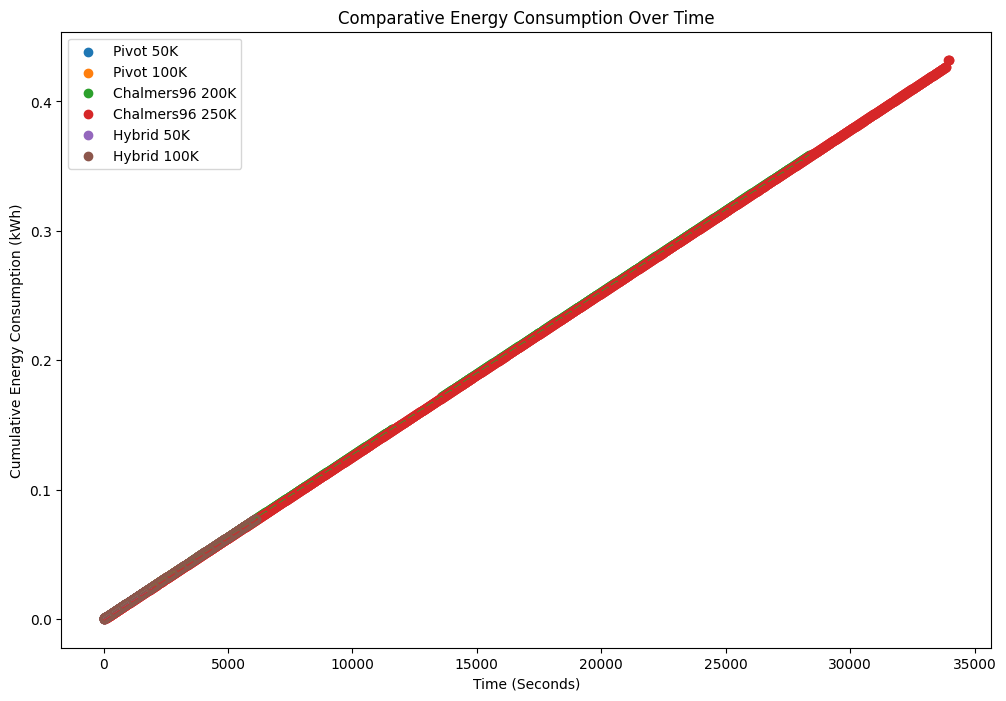

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import re

# Function to parse and prepare your dataset
def load_and_prepare_data(file_path):
    with open(file_path, 'r') as file:
        log_data = file.read()

    # Extract relevant data using regular expressions
    pattern = r'\[codecarbon INFO @ (\d{2}:\d{2}:\d{2})\] Energy consumed for RAM : ([\d\.]+) kWh. RAM Power : ([\d\.]+) W\n\[codecarbon INFO @ \d{2}:\d{2}:\d{2}\] Energy consumed for all CPUs : ([\d\.]+) kWh. Total CPU Power : ([\d\.]+) W'
    matches = re.findall(pattern, log_data)

    # Convert to DataFrame
    df = pd.DataFrame(matches, columns=['Time', 'Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W'])
    df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']] = df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']].astype(float)
    
    # Convert 'Time' to datetime
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
    
    return df

# Load datasets for each algorithm
# Pivot
pivot_data_50k = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/pivot50k.txt')
pivot_data_100k = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/pivot100k.txt')

# Chalmers96
chalmers_data_200k = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/poker2lakh.txt')
chalmers_data_250k = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/poker2.5lakhs.txt')

# Hybrid
hybrid_data_50k = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/hybrid50k.txt')
hybrid_data_100k = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/hybrid100k.txt')

# Prepare a combined DataFrame for plotting
combined_data = {
    'Pivot 50K': pivot_data_50k,
    'Pivot 100K': pivot_data_100k,
    'Chalmers96 200K': chalmers_data_200k,
    'Chalmers96 250K': chalmers_data_250k,
    'Hybrid 50K': hybrid_data_50k,
    'Hybrid 100K': hybrid_data_100k
}

plt.figure(figsize=(12, 8))

# Iterate over each dataset and plot
for label, data in combined_data.items():
    data['Cumulative_Energy_kWh'] = data['Energy_RAM_kWh'] + data['Energy_CPU_kWh']
    data['Time_Seconds'] = (data['Time'] - data['Time'].min()).dt.total_seconds()
    X = sm.add_constant(data['Time_Seconds'])
    y = data['Cumulative_Energy_kWh']
    model = sm.OLS(y, X).fit()
    plt.scatter(data['Time_Seconds'], y, label=label)
    plt.plot(data['Time_Seconds'], model.predict(X), linestyle='--')

plt.title('Comparative Energy Consumption Over Time')
plt.xlabel('Time (Seconds)')
plt.ylabel('Cumulative Energy Consumption (kWh)')
plt.legend()
plt.show()


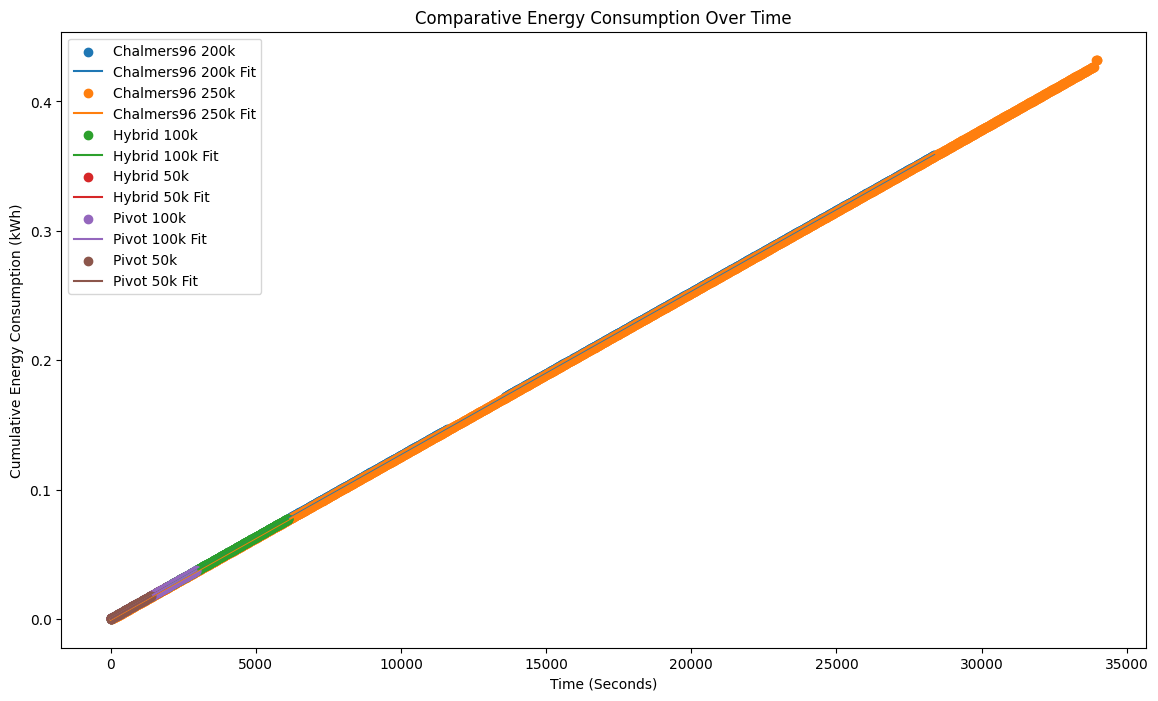

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import re

# Function to parse and prepare your dataset
def load_and_prepare_data(file_path):
    with open(file_path, 'r') as file:
        log_data = file.read()

    pattern = r'\[codecarbon INFO @ (\d{2}:\d{2}:\d{2})\] Energy consumed for RAM : ([\d\.]+) kWh. RAM Power : ([\d\.]+) W\n\[codecarbon INFO @ \d{2}:\d{2}:\d{2}\] Energy consumed for all CPUs : ([\d\.]+) kWh. Total CPU Power : ([\d\.]+) W'
    matches = re.findall(pattern, log_data)

    df = pd.DataFrame(matches, columns=['Time', 'Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W'])
    df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']] = df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']].astype(float)
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
    df['Cumulative_Energy_kWh'] = df['Energy_RAM_kWh'] + df['Energy_CPU_kWh']
    df['Time_Seconds'] = (df['Time'] - df['Time'].min()).dt.total_seconds()
    return df

# Load datasets for each algorithm
# Pivot
pivot_data_50k = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/pivot50k.txt')
pivot_data_100k = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/pivot100k.txt')


# Chalmers96
chalmers_data_200k = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/poker2lakh.txt')
chalmers_data_250k = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/poker2.5lakhs.txt')

# Hybrid
hybrid_data_50k = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/hybrid50k.txt')
hybrid_data_100k = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/hybrid100k.txt')

# Combine all datasets into one DataFrame for plotting
all_data = pd.concat([
    pivot_data_50k.assign(Algorithm='Pivot 50k'),
    pivot_data_100k.assign(Algorithm='Pivot 100k'),
    chalmers_data_200k.assign(Algorithm='Chalmers96 200k'),
    chalmers_data_250k.assign(Algorithm='Chalmers96 250k'),
    hybrid_data_50k.assign(Algorithm='Hybrid 50k'),
    hybrid_data_100k.assign(Algorithm='Hybrid 100k')
])

# Create a scatter plot for each algorithm
plt.figure(figsize=(14, 8))
for name, group in all_data.groupby('Algorithm'):
    # Perform linear regression
    X = sm.add_constant(group['Time_Seconds'])
    y = group['Cumulative_Energy_kWh']
    model = sm.OLS(y, X).fit()
    
    # Plot
    plt.scatter(group['Time_Seconds'], y, label=name)
    plt.plot(group['Time_Seconds'], model.predict(X), label=f"{name} Fit")

plt.xlabel('Time (Seconds)')
plt.ylabel('Cumulative Energy Consumption (kWh)')
plt.title('Comparative Energy Consumption Over Time')
plt.legend()
plt.show()


In [14]:
df.head()

Time  Energy_RAM_kWh  RAM_Power_W  Energy_CPU_kWh  \
0 1900-01-01 20:52:54        0.000012     2.957967        0.000177   
1 1900-01-01 20:53:09        0.000025     2.957967        0.000355   
2 1900-01-01 20:53:24        0.000037     2.957967        0.000532   
3 1900-01-01 20:53:40        0.000049     2.957967        0.000709   
4 1900-01-01 20:53:55        0.000062     2.957967        0.000886   

   CPU_Power_W  Total_Energy_kWh  Cumulative_Energy_kWh  Time_Seconds  
0         42.5          0.000189               0.000189           0.0  
1         42.5          0.000380               0.000569          15.0  
2         42.5          0.000569               0.001138          30.0  
3         42.5          0.000758               0.001896          46.0  
4         42.5          0.000948               0.002844          61.0

In [15]:
df['Record_Count'] = df.index + 1

In [16]:
df.head()

Time  Energy_RAM_kWh  RAM_Power_W  Energy_CPU_kWh  \
0 1900-01-01 20:52:54        0.000012     2.957967        0.000177   
1 1900-01-01 20:53:09        0.000025     2.957967        0.000355   
2 1900-01-01 20:53:24        0.000037     2.957967        0.000532   
3 1900-01-01 20:53:40        0.000049     2.957967        0.000709   
4 1900-01-01 20:53:55        0.000062     2.957967        0.000886   

   CPU_Power_W  Total_Energy_kWh  Cumulative_Energy_kWh  Time_Seconds  \
0         42.5          0.000189               0.000189           0.0   
1         42.5          0.000380               0.000569          15.0   
2         42.5          0.000569               0.001138          30.0   
3         42.5          0.000758               0.001896          46.0   
4         42.5          0.000948               0.002844          61.0   

   Record_Count  
0             1  
1             2  
2             3  
3             4  
4             5

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import re

# Function to parse and prepare your dataset
def load_and_prepare_data(file_path):
    with open(file_path, 'r') as file:
        log_data = file.read()

    pattern = r'\[codecarbon INFO @ (\d{2}:\d{2}:\d{2})\] Energy consumed for RAM : ([\d\.]+) kWh. RAM Power : ([\d\.]+) W\n\[codecarbon INFO @ \d{2}:\d{2}:\d{2}\] Energy consumed for all CPUs : ([\d\.]+) kWh. Total CPU Power : ([\d\.]+) W'
    matches = re.findall(pattern, log_data)

    df = pd.DataFrame(matches, columns=['Time', 'Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W'])
    df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']] = df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']].astype(float)
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
    df['Cumulative_Energy_kWh'] = df['Energy_RAM_kWh'] + df['Energy_CPU_kWh']
    df['Time_Seconds'] = (df['Time'] - df['Time'].min()).dt.total_seconds()
    return df

# Load datasets for each algorithm
# Pivot
pivot_data_50k = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/pivot50k.txt')
pivot_data_100k = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/pivot100k.txt')


# Chalmers96
chalmers_data_200k = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/poker2lakh.txt')
chalmers_data_250k = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/poker2.5lakhs.txt')

# Hybrid
hybrid_data_50k = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/hybrid50k.txt')
hybrid_data_100k = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/hybrid100k.txt')


pivot_data_50k['Record_Count'] = range(1, len(pivot_data_50k) + 1)
pivot_data_100k['Record_Count'] = range(1, len(pivot_data_100k) + 1)
chalmers_data_200k['Record_Count'] = range(1, len(chalmers_data_200k) + 1)
chalmers_data_250k['Record_Count'] = range(1, len(chalmers_data_250k) + 1)
hybrid_data_50k['Record_Count'] = range(1, len(hybrid_data_50k) + 1)
hybrid_data_100k['Record_Count'] = range(1, len(hybrid_data_100k) + 1)

# Now concatenate the datasets
all_data = pd.concat([
    pivot_data_50k,
    pivot_data_100k,
    chalmers_data_200k,
    chalmers_data_250k,
    hybrid_data_50k,
    hybrid_data_100k
], ignore_index=True)

# You can now plot the normalized energy consumption safely
plt.figure(figsize=(14, 8))
for name, group in all_data.groupby('Algorithm'):
    plt.plot(group['Time_Seconds'], group['Cumulative_Energy_kWh'] / group['Record_Count'], label=f"{name} Normalized")

plt.xlabel('Time (Seconds)')
plt.ylabel('Normalized Energy Consumption (kWh per record)')
plt.title('Normalized Energy Consumption Over Time')
plt.legend()
plt.show()

KeyError: 'Algorithm'

<Figure size 1400x800 with 0 Axes>

In [18]:
df.head()


Time  Energy_RAM_kWh  RAM_Power_W  Energy_CPU_kWh  \
0 1900-01-01 20:52:54        0.000012     2.957967        0.000177   
1 1900-01-01 20:53:09        0.000025     2.957967        0.000355   
2 1900-01-01 20:53:24        0.000037     2.957967        0.000532   
3 1900-01-01 20:53:40        0.000049     2.957967        0.000709   
4 1900-01-01 20:53:55        0.000062     2.957967        0.000886   

   CPU_Power_W  Total_Energy_kWh  Cumulative_Energy_kWh  Time_Seconds  \
0         42.5          0.000189               0.000189           0.0   
1         42.5          0.000380               0.000569          15.0   
2         42.5          0.000569               0.001138          30.0   
3         42.5          0.000758               0.001896          46.0   
4         42.5          0.000948               0.002844          61.0   

   Record_Count  
0             1  
1             2  
2             3  
3             4  
4             5

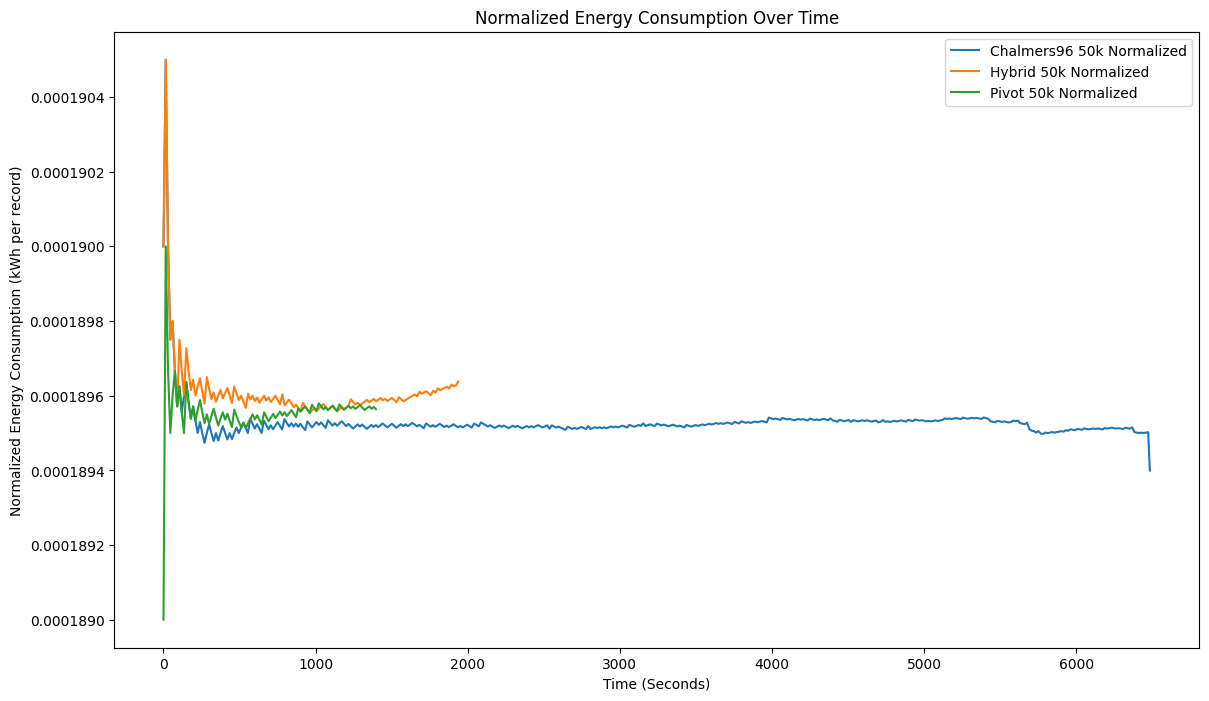

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import re

# Function to parse and prepare your dataset
def load_and_prepare_data(file_path, algorithm_name):
    with open(file_path, 'r') as file:
        log_data = file.read()

    pattern = r'\[codecarbon INFO @ (\d{2}:\d{2}:\d{2})\] Energy consumed for RAM : ([\d\.]+) kWh. RAM Power : ([\d\.]+) W\n\[codecarbon INFO @ \d{2}:\d{2}:\d{2}\] Energy consumed for all CPUs : ([\d\.]+) kWh. Total CPU Power : ([\d\.]+) W'
    matches = re.findall(pattern, log_data)

    df = pd.DataFrame(matches, columns=['Time', 'Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W'])
    df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']] = df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']].astype(float)
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
    df['Cumulative_Energy_kWh'] = df['Energy_RAM_kWh'] + df['Energy_CPU_kWh']
    df['Time_Seconds'] = (df['Time'] - df['Time'].min()).dt.total_seconds()
    df['Algorithm'] = algorithm_name  # Add the algorithm name here
    df['Record_Count'] = df.index + 1
    return df

# Load datasets for each algorithm and add the 'Algorithm' column
pivot_data_50k = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/pivot50k.txt', 'Pivot 50k')
chalmers_data_50k = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/poker50k.txt', 'Chalmers96 50k')
hybrid_data_50k = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/hybrid50k.txt', 'Hybrid 50k')

# Concatenate the datasets
all_data = pd.concat([
    pivot_data_50k,
    chalmers_data_50k,
    hybrid_data_50k 
])

# After concatenating the datasets, save to CSV
all_data.to_csv('50kenergy_data.csv', index=False)

# The CSV file can then be uploaded for analysis


# Plot the normalized energy consumption
plt.figure(figsize=(14, 8))
for name, group in all_data.groupby('Algorithm'):
    plt.plot(group['Time_Seconds'], group['Cumulative_Energy_kWh'] / group['Record_Count'], label=f"{name} Normalized")

plt.xlabel('Time (Seconds)')
plt.ylabel('Normalized Energy Consumption (kWh per record)')
plt.title('Normalized Energy Consumption Over Time')
plt.legend()
plt.show()


In [ ]:
dataframe for normlaized enrgy 

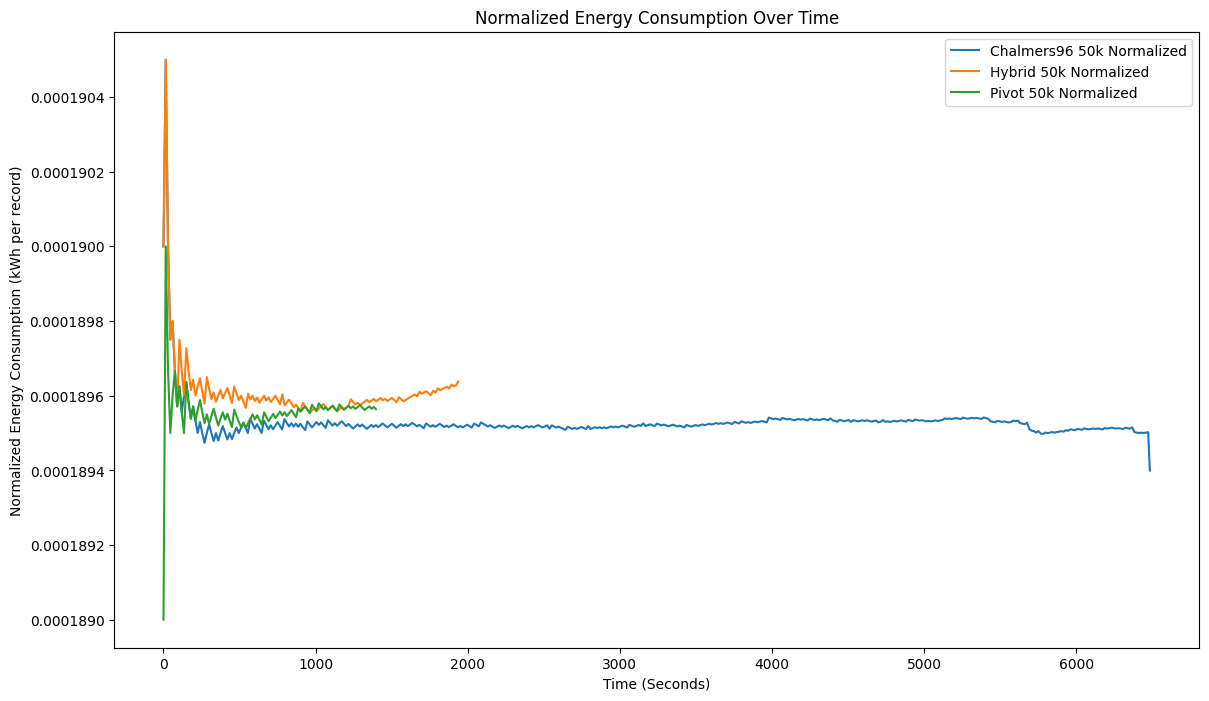

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Function to parse and prepare your dataset
def load_and_prepare_data(file_path, algorithm_name):
    with open(file_path, 'r') as file:
        log_data = file.read()

    pattern = r'\[codecarbon INFO @ (\d{2}:\d{2}:\d{2})\] Energy consumed for RAM : ([\d\.]+) kWh. RAM Power : ([\d\.]+) W\n\[codecarbon INFO @ \d{2}:\d{2}:\d{2}\] Energy consumed for all CPUs : ([\d\.]+) kWh. Total CPU Power : ([\d\.]+) W'
    matches = re.findall(pattern, log_data)

    df = pd.DataFrame(matches, columns=['Time', 'Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W'])
    df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']] = df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']].astype(float)
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
    df['Cumulative_Energy_kWh'] = df['Energy_RAM_kWh'] + df['Energy_CPU_kWh']
    df['Time_Seconds'] = (df['Time'] - df['Time'].min()).dt.total_seconds()
    df['Algorithm'] = algorithm_name
    df['Record_Count'] = df.index + 1
    return df

# Replace the file paths with your actual file paths
pivot_data_50k = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/pivot50k.txt', 'Pivot 50k')
chalmers_data_50k = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/poker50k.txt', 'Chalmers96 50k')
hybrid_data_50k = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/hybrid50k.txt', 'Hybrid 50k')


# Concatenate the datasets
all_data = pd.concat([
    pivot_data_50k,
    chalmers_data_50k,
    hybrid_data_50k 
])


# Calculate the normalized energy consumption for all_data
all_data['Normalized_Energy_kWh'] = all_data['Cumulative_Energy_kWh'] / all_data['Record_Count']

# Create an empty DataFrame to store normalized energy data
normalized_energy_df = pd.DataFrame()

# Loop through each group in 'all_data' grouped by 'Algorithm'
for name, group in all_data.groupby('Algorithm'):
    # Select only the relevant columns to add to the new DataFrame
    normalized_group = group[['Time_Seconds', 'Normalized_Energy_kWh']].copy()
    normalized_group['Algorithm'] = name  # Add the algorithm name here
    # Concatenate the normalized data into the normalized_energy_df DataFrame
    normalized_energy_df = pd.concat([normalized_energy_df, normalized_group], ignore_index=True)

# Save the normalized energy data to a CSV file
normalized_energy_df.to_csv('normalized_50kenergy_data.csv', index=False)

# Plot the normalized energy consumption
plt.figure(figsize=(14, 8))
for name, group in all_data.groupby('Algorithm'):
    plt.plot(group['Time_Seconds'], group['Normalized_Energy_kWh'], label=f"{name} Normalized")

plt.xlabel('Time (Seconds)')
plt.ylabel('Normalized Energy Consumption (kWh per record)')
plt.title('Normalized Energy Consumption Over Time')
plt.legend()
plt.show()



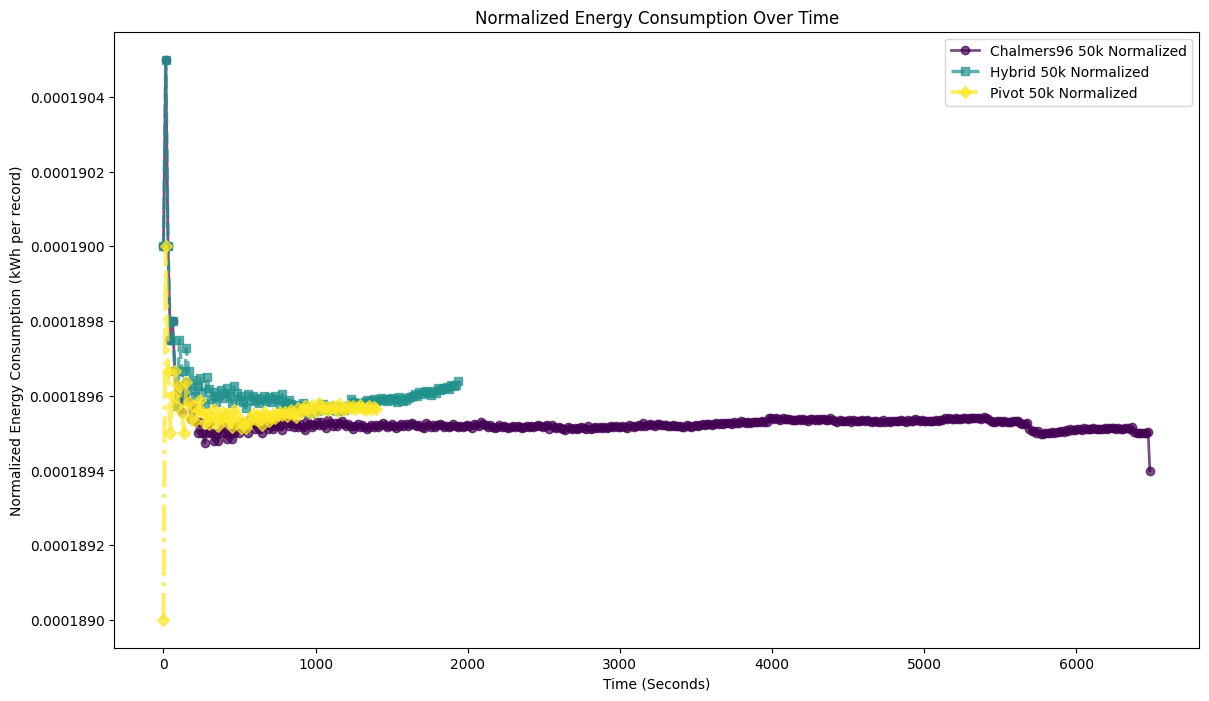

In [29]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 8))
line_styles = ['-', '--', '-.', ':']
line_widths = [2, 2.5, 3, 3.5]
markers = ['o', 's', 'D', '^']
colors = plt.cm.viridis(np.linspace(0, 1, len(all_data['Algorithm'].unique())))

for (name, group), ls, lw, m, c in zip(all_data.groupby('Algorithm'), line_styles, line_widths, markers, colors):
    plt.plot(group['Time_Seconds'], group['Normalized_Energy_kWh'], label=f"{name} Normalized", linestyle=ls, linewidth=lw, marker=m, alpha=0.7, color=c)

plt.xlabel('Time (Seconds)')
plt.ylabel('Normalized Energy Consumption (kWh per record)')
plt.title('Normalized Energy Consumption Over Time')
plt.legend()
plt.show()


In [31]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Assuming 'all_data' is your DataFrame and it's already prepared
fig = make_subplots()

#trace for each algorithm
for name, group in all_data.groupby('Algorithm'):
    fig.add_trace(go.Scatter(x=group['Time_Seconds'], y=group['Normalized_Energy_kWh'],
                             mode='lines+markers',
                             name=f"{name} Normalized"))

# Highlight key data points
# Example: highlighting maximum points for each algorithm
for name, group in all_data.groupby('Algorithm'):
    max_point = group[group['Normalized_Energy_kWh'] == group['Normalized_Energy_kWh'].max()]
    fig.add_trace(go.Scatter(x=max_point['Time_Seconds'], y=max_point['Normalized_Energy_kWh'],
                             mode='markers', marker=dict(color='red', size=10),
                             name=f"{name} Peak"))

fig.update_layout(title='Normalized Energy Consumption Over Time',
                  xaxis_title='Time (Seconds)',
                  yaxis_title='Normalized Energy Consumption (kWh per record)',
                  legend_title='Algorithm')

fig.show()


In [40]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Assuming 'all_data' is your DataFrame and it's already prepared
fig = make_subplots()

# Iterate over each algorithm and add its trace to the figure
for name, group in all_data.groupby('Algorithm'):
    # Main trace for each algorithm
    fig.add_trace(go.Scatter(x=group['Time_Seconds'], y=group['Normalized_Energy_kWh'],
                             mode='lines+markers',
                             name=f"{name} Normalized"))

    # Calculate the peak, start, and end values
    max_point = group[group['Normalized_Energy_kWh'] == group['Normalized_Energy_kWh'].max()]
    start_point = group.iloc[0]
    end_point = group.iloc[-1]

    # Add the peak point with text for each algorithm
    fig.add_trace(go.Scatter(x=[max_point['Time_Seconds'].iloc[0]], y=[max_point['Normalized_Energy_kWh'].iloc[0]],
                             mode='markers+text',
                             marker=dict(color='red', size=10),
                             text=[f"{max_point['Normalized_Energy_kWh'].iloc[0]:.6f}"],
                             textposition="top center",
                             name='Peak'))

    # Add the start point with text for each algorithm
    fig.add_trace(go.Scatter(x=[start_point['Time_Seconds']], y=[start_point['Normalized_Energy_kWh']],
                             mode='markers+text',
                             marker=dict(color='green', size=10),
                             text=[f"{start_point['Normalized_Energy_kWh']:.6f}"],
                             textposition="bottom center",
                             name='Start'))

    # Add the ending point with text for each algorithm
    fig.add_trace(go.Scatter(x=[end_point['Time_Seconds']], y=[end_point['Normalized_Energy_kWh']],
                             mode='markers+text',
                             marker=dict(color='blue', size=10),
                             text=[f"{end_point['Normalized_Energy_kWh']:.6f}"],
                             textposition="bottom center",
                             name='End'))

# Update the layout of the figure
fig.update_layout(title='Normalized Energy Consumption Over Time',
                  xaxis_title='Time (Seconds)',
                  yaxis_title='Normalized Energy Consumption (kWh per record)',
                  legend_title='Algorithm')

# Show the figure
fig.show()


In [38]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Assuming 'all_data' is your DataFrame and it's already prepared
# Create subplots, one for each algorithm
num_algorithms = len(all_data['Algorithm'].unique())
fig = make_subplots(rows=num_algorithms, cols=1, subplot_titles=all_data['Algorithm'].unique())

# This counter will help us place each algorithm's plot in the correct subplot row
row_counter = 1

# Define colors for start, peak, and end to use in both traces and the legend
start_color = 'green'
peak_color = 'red'
end_color = 'blue'

# Add a trace for each algorithm
for name, group in all_data.groupby('Algorithm'):
    # Calculate max, start, and end points
    max_point = group[group['Normalized_Energy_kWh'] == group['Normalized_Energy_kWh'].max()]
    start_point = group.iloc[0]
    end_point = group.iloc[-1]

    # Main line trace for the algorithm
    fig.add_trace(go.Scatter(x=group['Time_Seconds'], y=group['Normalized_Energy_kWh'],
                             mode='lines+markers',
                             name=f"{name} Normalized",
                             legendgroup=name),  # use legendgroup to tie legends together
                  row=row_counter, col=1)

    # Start point
    fig.add_trace(go.Scatter(x=[start_point['Time_Seconds']], y=[start_point['Normalized_Energy_kWh']],
                             mode='markers+text',
                             marker=dict(color=start_color, size=10),
                             name='Start',
                             legendgroup=name,
                             text=[f"{start_point['Normalized_Energy_kWh']:.6f}"],
                             textposition="bottom right"),
                  row=row_counter, col=1)

    # Peak point
    fig.add_trace(go.Scatter(x=max_point['Time_Seconds'], y=max_point['Normalized_Energy_kWh'],
                             mode='markers+text',
                             marker=dict(color=peak_color, size=10),
                             name='Peak',
                             legendgroup=name,
                             text=[f"{max_point['Normalized_Energy_kWh'].iloc[0]:.6f}"],
                             textposition="bottom right"),
                  row=row_counter, col=1)

    # End point
    fig.add_trace(go.Scatter(x=[end_point['Time_Seconds']], y=[end_point['Normalized_Energy_kWh']],
                             mode='markers+text',
                             marker=dict(color=end_color, size=10),
                             name='End',
                             legendgroup=name,
                             text=[f"{end_point['Normalized_Energy_kWh']:.6f}"],
                             textposition="bottom right"),
                  row=row_counter, col=1)
    
    row_counter += 1

# Update the layout to add a shared legend
fig.update_layout(height=600*num_algorithms, title='Normalized Energy Consumption Over Time',
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  showlegend=True)

# Update axes titles
fig.update_xaxes(title_text='Time (Seconds)')
fig.update_yaxes(title_text='Normalized Energy Consumption (kWh per record)')

fig.show()


In [30]:
pip install plotly


   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.6 MB 1.2 MB/s eta 0:00:14
    --------------------------------------- 0.2/15.6 MB 2.2 MB/s eta 0:00:08
    --------------------------------------- 0.4/15.6 MB 2.3 MB/s eta 0:00:07
   - -------------------------------------- 0.6/15.6 MB 3.1 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/15.6 MB 3.3 MB/s eta 0:00:05
   -- ------------------------------------- 1.1/15.6 MB 3.8 MB/s eta 0:00:04
   --- ------------------------------------ 1.2/15.6 MB 3.7 MB/s eta 0:00:04
   --- ------------------------------------ 1.5/15.6 MB 3.9 MB/s eta 0:00:04
   ---- ----------------------------------- 1.7/15.6 MB 3.9 MB/s eta 0:00:04
   ----- ---------------------------------- 2.0/15.6 MB 4.2 MB/s eta 0:00:04
   ----- ---------------------------------- 2.2/15.6 MB 4.2 MB/s eta 0:00:04
   ------ ---

In [24]:
all_data.to_csv('C:/Users/pc/Desktop/MSC project/force-directed-layout-algorithms/examples/normalized_energy_data.csv', index=False)


Time  Energy_RAM_kWh  RAM_Power_W  Energy_CPU_kWh  \
0   1900-01-01 20:18:07        0.000012     2.957967        0.000177   
1   1900-01-01 20:18:22        0.000025     2.957967        0.000355   
2   1900-01-01 20:18:37        0.000037     2.957967        0.000532   
3   1900-01-01 20:18:52        0.000049     2.957967        0.000709   
4   1900-01-01 20:19:07        0.000062     2.957967        0.000886   
..                  ...             ...          ...             ...   
125 1900-01-01 20:10:09        0.001554     2.957967        0.022338   
126 1900-01-01 20:10:24        0.001567     2.957967        0.022516   
127 1900-01-01 20:10:39        0.001579     2.957967        0.022693   
128 1900-01-01 20:10:54        0.001591     2.957967        0.022871   
129 1900-01-01 20:11:09        0.001604     2.957967        0.023049   

     CPU_Power_W  Cumulative_Energy_kWh  Time_Seconds   Algorithm  \
0           42.5               0.000189           0.0   Pivot 50k   
1           42.5               0.000380          15.0   Pivot 50k   
2           42.5               0.000569          30.0   Pivot 50k   
3           42.5               0.000758          45.0   Pivot 50k   
4           42.5               0.000948          60.0   Pivot 50k   
..           ...                    ...           ...         ...   
125         42.5               0.023892        1878.0  Hybrid 50k   
126         42.5               0.024083        1893.0  Hybrid 50k   
127         42.5               0.024272        1908.0  Hybrid 50k   
128         42.5               0.024462        1923.0  Hybrid 50k   
129         42.5               0.024653        1938.0  Hybrid 50k   

     Record_Count  Normalized_Energy_kWh  
0               1               0.000189  
1               2               0.000190  
2               3               0.000190  
3               4               0.000189  
4               5               0.000190  
..            ...                    ...  
125           126               0.000190  
126           127               0.000190  
127           128               0.000190  
128           129               0.000190  
129           130               0.000190  

[657 rows x 10 columns]

In [17]:
normalized_energy_df

Time_Seconds  Normalized_Energy_kWh       Algorithm
0             0.0                0.00019  Chalmers96 50k
1            15.0                0.00019  Chalmers96 50k
2            30.0                0.00019  Chalmers96 50k
3            45.0                0.00019  Chalmers96 50k
4            60.0                0.00019  Chalmers96 50k
..            ...                    ...             ...
652        1337.0                0.00019       Pivot 50k
653        1352.0                0.00019       Pivot 50k
654        1367.0                0.00019       Pivot 50k
655        1382.0                0.00019       Pivot 50k
656        1397.0                0.00019       Pivot 50k

[657 rows x 3 columns]

In [20]:
normalized_energy_df.describe()

Time_Seconds  Normalized_Energy_kWh
count    657.000000           6.570000e+02
mean    2428.858447           1.895489e-04
std     1923.933327           8.024158e-08
min        0.000000           1.890000e-04
25%      811.000000           1.895179e-04
50%     1756.000000           1.895311e-04
75%     4024.000000           1.895652e-04
max     6483.000000           1.905000e-04

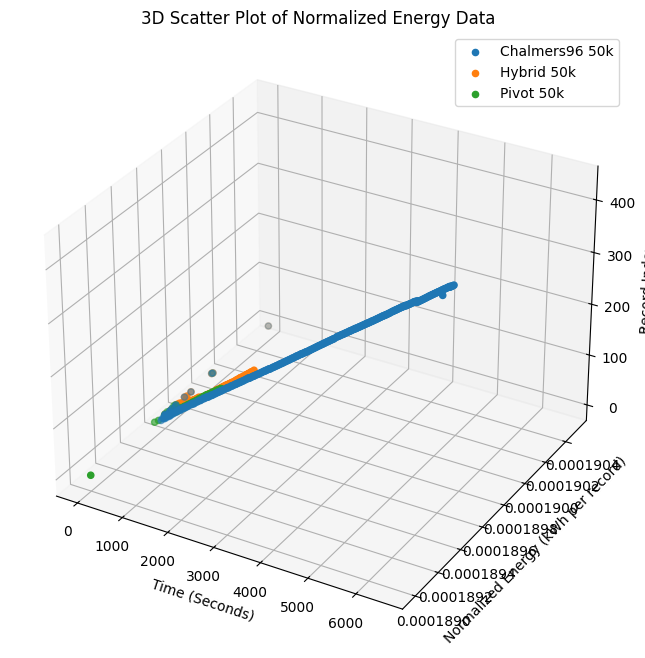

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each algorithm's data in the scatter plot
for name, group in normalized_energy_df.groupby('Algorithm'):
    ax.scatter(group['Time_Seconds'], group['Normalized_Energy_kWh'], zs=range(len(group)), label=name)

ax.set_xlabel('Time (Seconds)')
ax.set_ylabel('Normalized Energy (kWh per record)')
ax.set_zlabel('Record Index')
ax.set_title('3D Scatter Plot of Normalized Energy Data')
ax.legend()

plt.show()


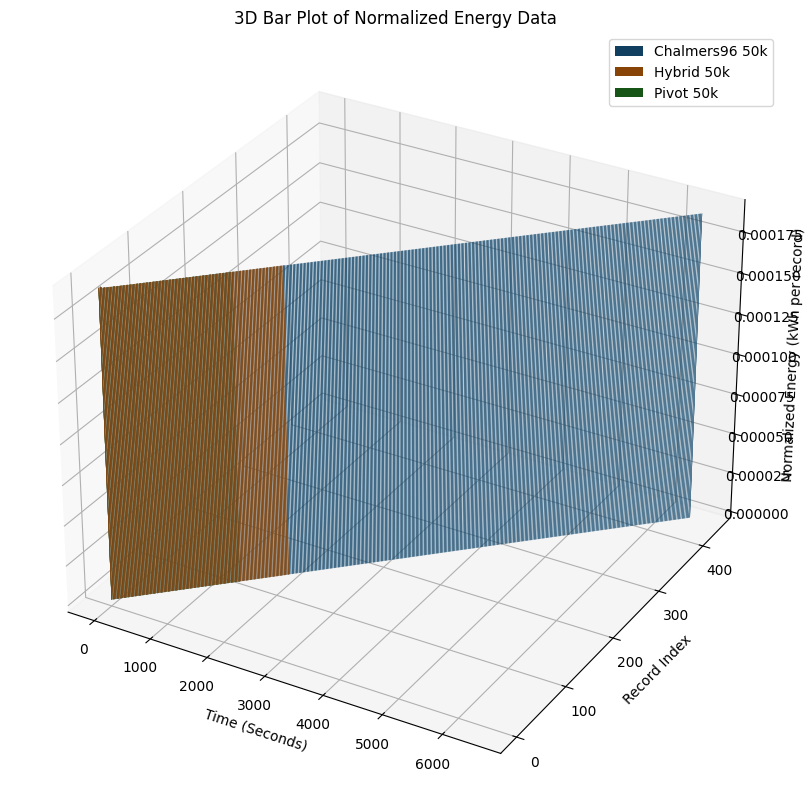

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a 3D bar plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Preparing data for 3D bar plot
for algorithm in normalized_energy_df['Algorithm'].unique():
    subset = normalized_energy_df[normalized_energy_df['Algorithm'] == algorithm]
    xs = subset['Time_Seconds']
    ys = subset['Normalized_Energy_kWh']
    zs = range(len(subset))

    ax.bar3d(xs, zs, np.zeros(len(xs)), 1, 1, ys, label=algorithm)

ax.set_xlabel('Time (Seconds)')
ax.set_ylabel('Record Index')
ax.set_zlabel('Normalized Energy (kWh per record)')
ax.set_title('3D Bar Plot of Normalized Energy Data')
ax.legend()

plt.show()


In [18]:
normalized_energy_df.to_csv('C:/Users/pc/Desktop/MSC project/force-directed-layout-algorithms/examples/normalized_energy_data.csv', index=False)


In [ ]:
paramter ( ALPHA )

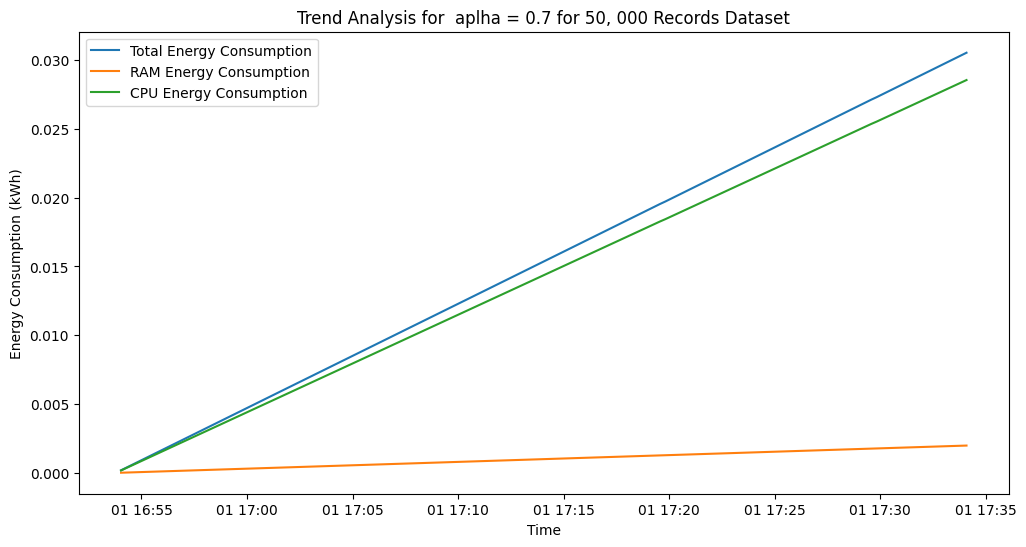

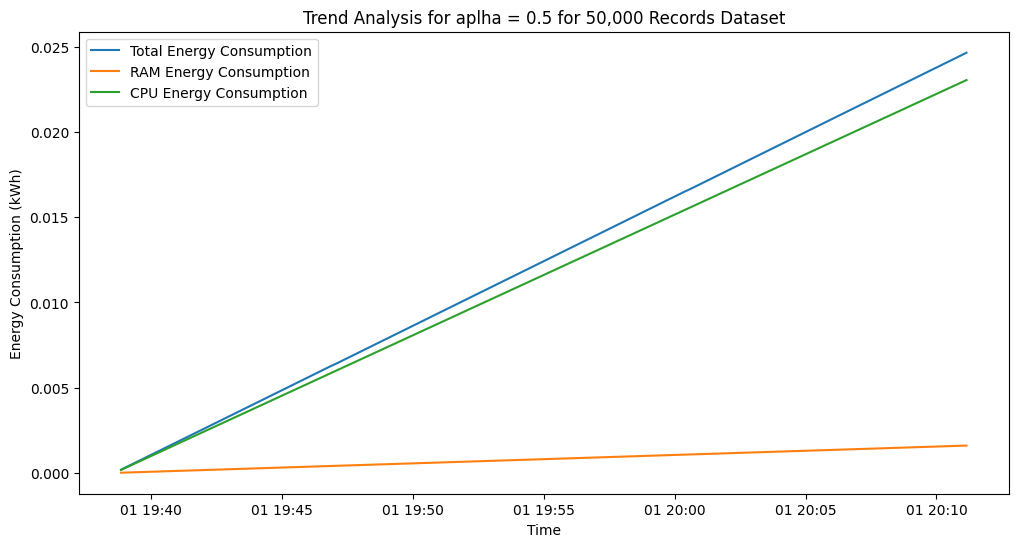

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
import re

# Function to parse and prepare your dataset
def load_and_prepare_data(file_path):
    with open(file_path, 'r') as file:
        log_data = file.read()

    pattern = r'\[codecarbon INFO @ (\d{2}:\d{2}:\d{2})\] Energy consumed for RAM : ([\d\.]+) kWh. RAM Power : ([\d\.]+) W\n\[codecarbon INFO @ \d{2}:\d{2}:\d{2}\] Energy consumed for all CPUs : ([\d\.]+) kWh. Total CPU Power : ([\d\.]+) W'
    matches = re.findall(pattern, log_data)

    df = pd.DataFrame(matches, columns=['Time', 'Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W'])
    df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']] = df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']].astype(float)
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
    
    return df

# Load your datasets
your_data_1 = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/0.5hybrid50k.txt')
your_data_2 = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/hybrid50k.txt')


# Trend Analysis Function
def trend_analysis(df, title):
    fig, ax = plt.subplots(figsize=(12, 6))
    df['Total_Energy_kWh'] = df['Energy_RAM_kWh'] + df['Energy_CPU_kWh']
    ax.plot(df['Time'], df['Total_Energy_kWh'], label='Total Energy Consumption')
    ax.plot(df['Time'], df['Energy_RAM_kWh'], label='RAM Energy Consumption')
    ax.plot(df['Time'], df['Energy_CPU_kWh'], label='CPU Energy Consumption')
    ax.set_title(title)
    ax.set_xlabel('Time')
    ax.set_ylabel('Energy Consumption (kWh)')
    ax.legend()
    plt.show()

# Perform Trend Analysis for each dataset
trend_analysis(your_data_1, 'Trend Analysis for  aplha = 0.7 for 50, 000 Records Dataset')
trend_analysis(your_data_2, 'Trend Analysis for aplha = 0.5 for 50,000 Records Dataset')





In [ ]:
Statisics and  bar graph 

                              OLS Regression Results                             
Dep. Variable:     Cumulative_Energy_kWh   R-squared:                       0.939
Model:                               OLS   Adj. R-squared:                  0.939
Method:                    Least Squares   F-statistic:                     2448.
Date:                   Thu, 07 Dec 2023   Prob (F-statistic):           1.74e-98
Time:                           15:45:12   Log-Likelihood:                 44.970
No. Observations:                    161   AIC:                            -85.94
Df Residuals:                        159   BIC:                            -79.78
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (2,).

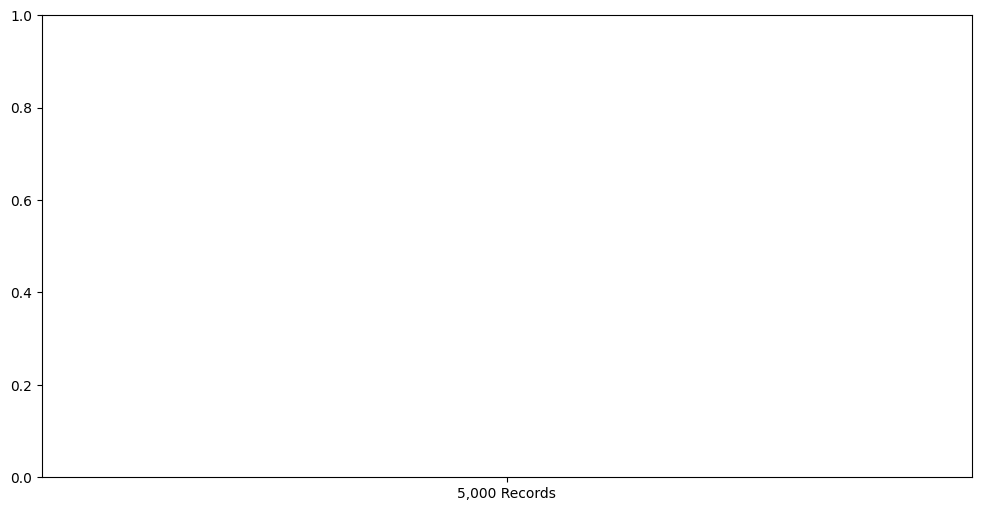

In [4]:
# Statistical Analysis Function
def perform_statistical_analysis(df):
    df['Cumulative_Energy_kWh'] = df['Total_Energy_kWh'].cumsum()
    df['Time_Seconds'] = (df['Time'] - df['Time'].min()).dt.total_seconds()
    X = sm.add_constant(df['Time_Seconds'])
    y = df['Cumulative_Energy_kWh']
    model = sm.OLS(y, X).fit()
    return model.summary()

# Perform Statistical Analysis for each dataset
summary_1 = perform_statistical_analysis(your_data_1)
summary_2 = perform_statistical_analysis(your_data_2)



# Print summaries
print(summary_1)
print(summary_2)



# Bar Graph Comparison
def calculate_total_energy(df):
    return df['Total_Energy_kWh'].sum()

datasets = ['5,000 Records', '50,000 Records', '100,000 Records']
total_energy = [calculate_total_energy(df) for df in [your_data_1, your_data_2]]

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(datasets, total_energy, color=['blue', 'green', 'red', 'purple'])
ax.set_xlabel('Dataset Size')
ax.set_ylabel('Total Energy Consumption (kWh)')
ax.set_title('Energy Consumption Comparison by Dataset Size')
plt.show()

In [ ]:
box plot for different alphas 

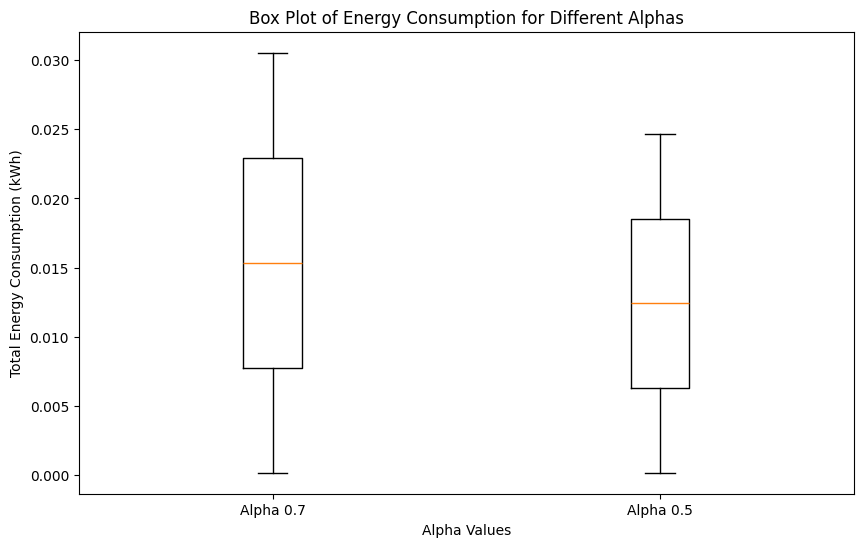

In [30]:
# Function to aggregate total energy consumption
def aggregate_energy(df):
    df['Total_Energy_kWh'] = df['Energy_RAM_kWh'] + df['Energy_CPU_kWh']
    return df['Total_Energy_kWh']

# Aggregate energy for each dataset
total_energy_1 = aggregate_energy(your_data_1)
total_energy_2 = aggregate_energy(your_data_2)

# Box Plot for Energy Consumption
plt.figure(figsize=(10, 6))
plt.boxplot([total_energy_1, total_energy_2], labels=['Alpha 0.7', 'Alpha 0.5'])
plt.title('Box Plot of Energy Consumption for Different Alphas')
plt.ylabel('Total Energy Consumption (kWh)')
plt.xlabel('Alpha Values')
plt.show()

In [ ]:
grouped bar plot abd viline plot 

In [33]:
import seaborn as sns

C:\Users\pc\AppData\Local\Temp\ipykernel_1092\2629810935.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Alpha', y='Total_Energy_kWh', data=combined_data, palette='Set2')


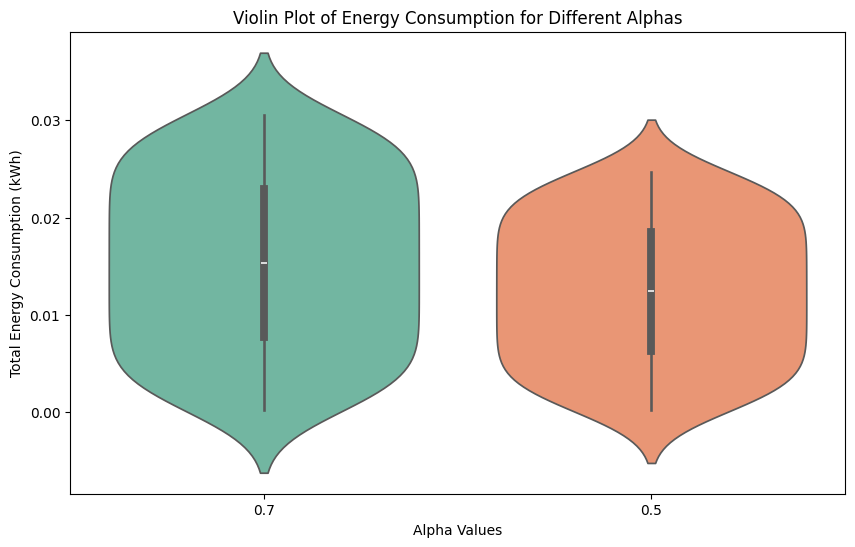

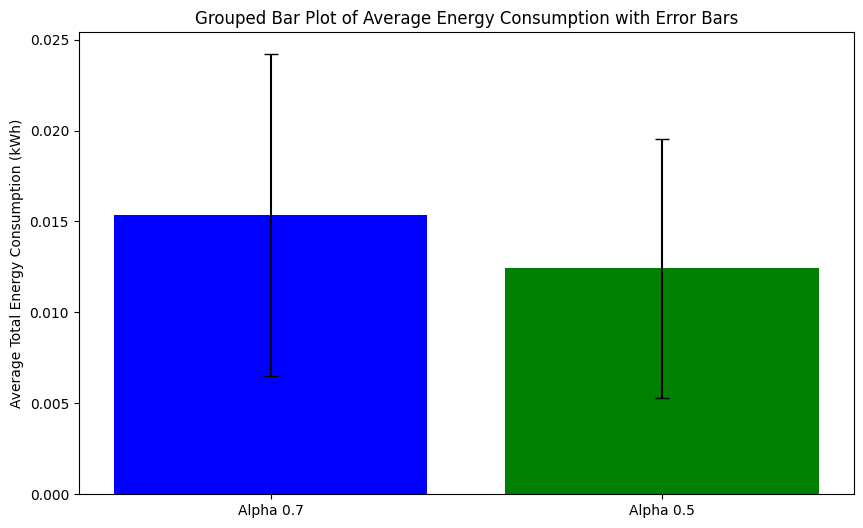

In [34]:
def create_violin_plot(data1, data2):
    # Combine the data
    combined_data = pd.concat([data1.assign(Alpha='0.7'), data2.assign(Alpha='0.5')], ignore_index=True)
    
    # Create a violin plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Alpha', y='Total_Energy_kWh', data=combined_data, palette='Set2')
    plt.title('Violin Plot of Energy Consumption for Different Alphas')
    plt.ylabel('Total Energy Consumption (kWh)')
    plt.xlabel('Alpha Values')
    plt.show()

# New function to create a grouped bar plot with error bars
def create_grouped_bar_plot(data1, data2):
    # Prepare the data
    means = data1.mean(), data2.mean()
    errors = data1.std(), data2.std()
    labels = ['Alpha 0.7', 'Alpha 0.5']
    
    # Create a grouped bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(labels, means, yerr=errors, capsize=5, color=['blue', 'green'])
    plt.title('Grouped Bar Plot of Average Energy Consumption with Error Bars')
    plt.ylabel('Average Total Energy Consumption (kWh)')
    plt.show()

#total energy consumption for each dataset
your_data_1['Total_Energy_kWh'] = your_data_1['Energy_RAM_kWh'] + your_data_1['Energy_CPU_kWh']
your_data_2['Total_Energy_kWh'] = your_data_2['Energy_RAM_kWh'] + your_data_2['Energy_CPU_kWh']

#Violin Plot
create_violin_plot(your_data_1, your_data_2)

# Grouped Bar Plot
create_grouped_bar_plot(your_data_1['Total_Energy_kWh'], your_data_2['Total_Energy_kWh'])
    

In [26]:
import scipy.stats as stats

In [27]:
def describe_data(df):
    print("Descriptive Statistics:")
    print(df[['Energy_RAM_kWh', 'Energy_CPU_kWh', 'Total_Energy_kWh']].describe())

describe_data(your_data_1)
describe_data(your_data_2)

# T-Test for Energy Consumption
def t_test_energy(data1, data2):
    t_stat, p_val = stats.ttest_ind(data1['Total_Energy_kWh'], data2['Total_Energy_kWh'])
    print(f"T-Test Results: T-statistic = {t_stat}, P-value = {p_val}")

t_test_energy(your_data_1, your_data_2)

# Add Layout Time Data (assuming you have this data in a DataFrame)
layout_times = pd.DataFrame({
    'alpha': [0.5, 0.7],
    'layout_time_seconds': [2424.42, 1963.69]
})

Descriptive Statistics:
       Energy_RAM_kWh  Energy_CPU_kWh  Total_Energy_kWh
count      161.000000      161.000000        161.000000
mean         0.000999        0.014357          0.015355
std          0.000575        0.008264          0.008839
min          0.000012        0.000177          0.000189
25%          0.000505        0.007266          0.007771
50%          0.000999        0.014355          0.015354
75%          0.001492        0.021447          0.022939
max          0.001985        0.028540          0.030525
Descriptive Statistics:
       Energy_RAM_kWh  Energy_CPU_kWh  Total_Energy_kWh
count      130.000000      130.000000        130.000000
mean         0.000808        0.011611          0.012418
std          0.000465        0.006678          0.007143
min          0.000012        0.000178          0.000190
25%          0.000410        0.005894          0.006304
50%          0.000808        0.011609          0.012416
75%          0.001206        0.017327          0.018533


In [6]:
import os

current_directory = os.getcwd()
print(current_directory)


C:\Users\pc


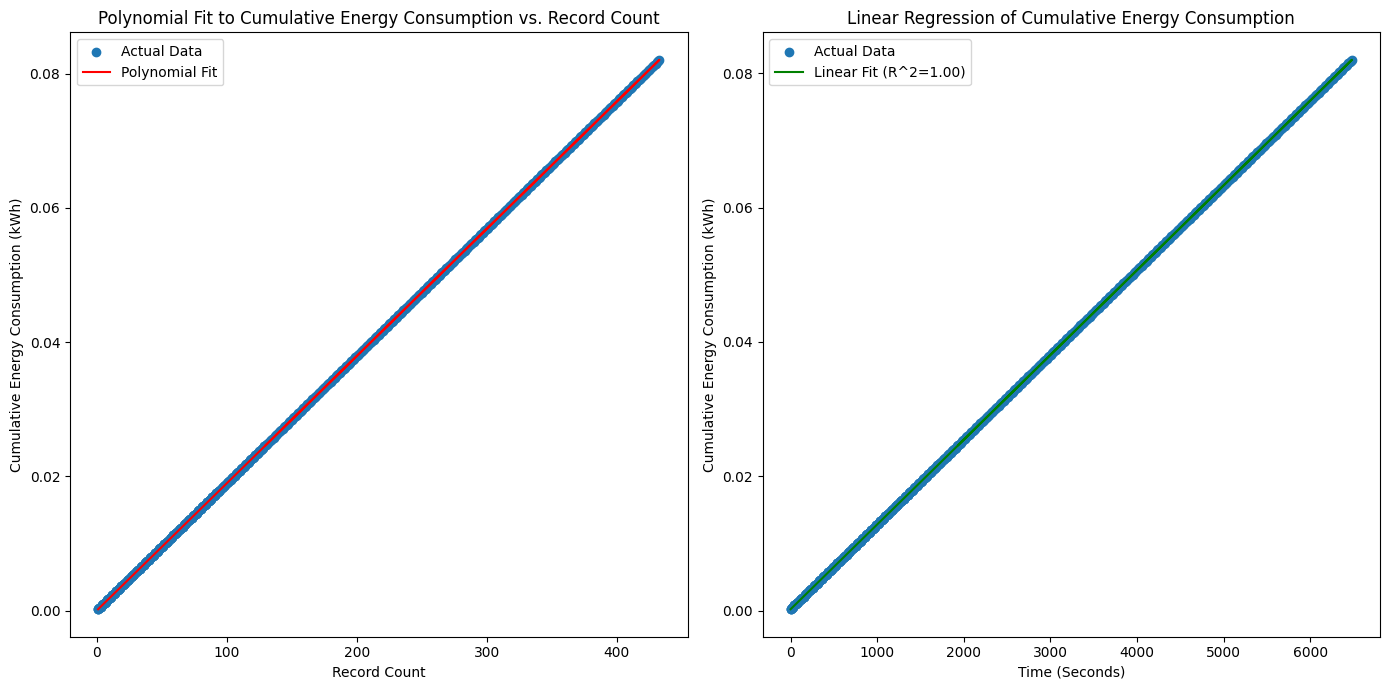

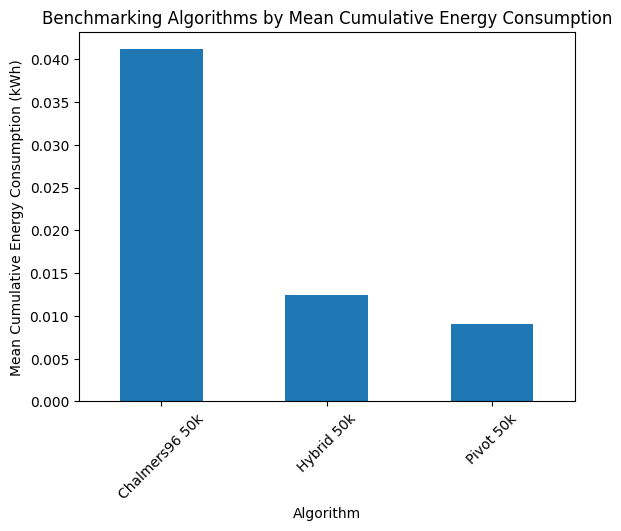

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
df = pd.read_csv('C:/Users/pc/Desktop/50kenergy_data.csv')  # Replace with your actual file path

# 2. Computational Complexity Analysis
# Assuming 'Record_Count' represents the size of the dataset and 'Cumulative_Energy_kWh' is the energy consumption
coefficients = np.polyfit(df['Record_Count'], df['Cumulative_Energy_kWh'], deg=2)
poly = np.poly1d(coefficients)
df['Poly_Fit'] = poly(df['Record_Count'])

# 7. Regression Analysis
# Assume 'Time_Seconds' is the independent variable and 'Cumulative_Energy_kWh' is the dependent variable
model = LinearRegression()
model.fit(df[['Time_Seconds']], df['Cumulative_Energy_kWh'])
df['Linear_Fit'] = model.predict(df[['Time_Seconds']])
r_squared = r2_score(df['Cumulative_Energy_kWh'], df['Linear_Fit'])

# 9. Benchmarking Against Standards or Other Algorithms
# You would compare the 'Cumulative_Energy_kWh' at a given 'Record_Count' for your algorithm against others
pivot_50k_energy = df[df['Algorithm'] == 'Pivot 50k']['Cumulative_Energy_kWh'].mean()

# Plotting all the analyses
plt.figure(figsize=(14, 7))

# Plot the polynomial fit
plt.subplot(1, 2, 1)
plt.scatter(df['Record_Count'], df['Cumulative_Energy_kWh'], label='Actual Data')
plt.plot(df['Record_Count'], df['Poly_Fit'], color='red', label='Polynomial Fit')
plt.xlabel('Record Count')
plt.ylabel('Cumulative Energy Consumption (kWh)')
plt.title('Polynomial Fit to Cumulative Energy Consumption vs. Record Count')
plt.legend()

# Plot the linear regression fit
plt.subplot(1, 2, 2)
plt.scatter(df['Time_Seconds'], df['Cumulative_Energy_kWh'], label='Actual Data')
plt.plot(df['Time_Seconds'], df['Linear_Fit'], color='green', label='Linear Fit (R^2={:.2f})'.format(r_squared))
plt.xlabel('Time (Seconds)')
plt.ylabel('Cumulative Energy Consumption (kWh)')
plt.title('Linear Regression of Cumulative Energy Consumption')
plt.legend()

plt.tight_layout()
plt.show()

# Benchmarking
benchmark_df = df.groupby('Algorithm')['Cumulative_Energy_kWh'].mean().reset_index()
benchmark_df.plot(x='Algorithm', y='Cumulative_Energy_kWh', kind='bar', legend=False)
plt.ylabel('Mean Cumulative Energy Consumption (kWh)')
plt.title('Benchmarking Algorithms by Mean Cumulative Energy Consumption')
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x600 with 0 Axes>

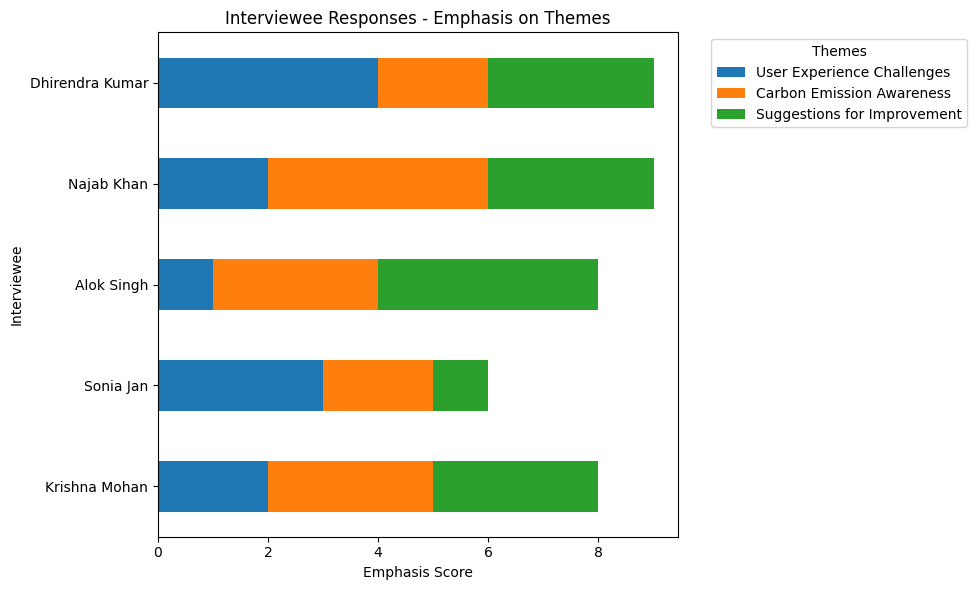

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Assigning quantitative values to each theme for each interviewee based on their responses
# These values are illustrative and based on the emphasis in their responses
data = {
    'Krishna Mohan': {'User Experience Challenges': 2, 'Carbon Emission Awareness': 3, 'Suggestions for Improvement': 3},
    'Sonia Jan': {'User Experience Challenges': 3, 'Carbon Emission Awareness': 2, 'Suggestions for Improvement': 1},
    'Alok Singh': {'User Experience Challenges': 1, 'Carbon Emission Awareness': 3, 'Suggestions for Improvement': 4},
    'Najab Khan': {'User Experience Challenges': 2, 'Carbon Emission Awareness': 4, 'Suggestions for Improvement': 3},
    'Dhirendra Kumar': {'User Experience Challenges': 4, 'Carbon Emission Awareness': 2, 'Suggestions for Improvement': 3}
}

# Creating a DataFrame from the data
df = pd.DataFrame(data).T

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
ax = df.plot(kind='barh', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('Interviewee Responses - Emphasis on Themes')
plt.xlabel('Emphasis Score')
plt.ylabel('Interviewee')
plt.legend(title='Themes', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


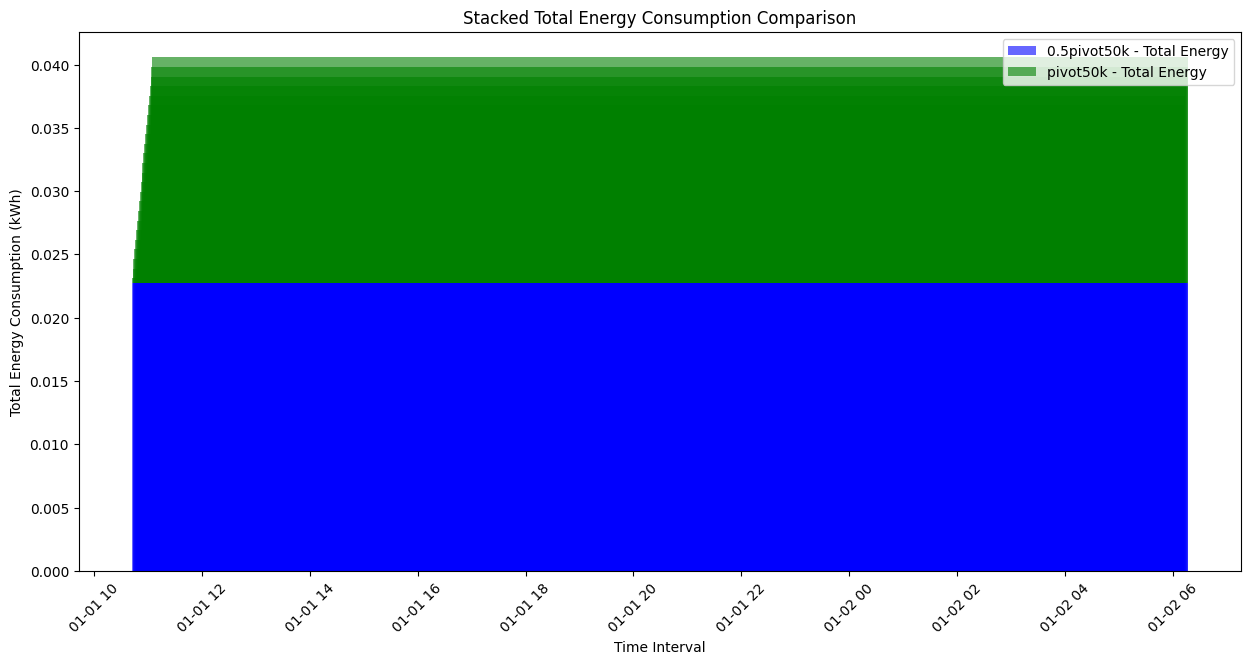

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

def load_and_prepare_data(file_path):
    # Load data
    with open(file_path, 'r') as file:
        log_data = file.read()

    # Extract relevant data using regular expressions
    pattern = r'\[codecarbon INFO @ (\d{2}:\d{2}:\d{2})\] Energy consumed for RAM : ([\d\.]+) kWh. RAM Power : ([\d\.]+) W\n\[codecarbon INFO @ \d{2}:\d{2}:\d{2}\] Energy consumed for all CPUs : ([\d\.]+) kWh. Total CPU Power : ([\d\.]+) W'
    matches = re.findall(pattern, log_data)

    # Convert to DataFrame
    df = pd.DataFrame(matches, columns=['Time', 'Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W'])
    df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']] = df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']].astype(float)
    
    # Convert 'Time' to datetime
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
    
    return df
# Load and prepare data for both files
df_05 = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/0.5pivot50k.txt') 
df_new = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/pivot50k.txt')    
# Calculating the total cumulative energy (RAM + CPU) for both files
df_05['Total_Energy_kWh'] = df_05['Energy_RAM_kWh'] + df_05['Energy_CPU_kWh']
df_new['Total_Energy_kWh'] = df_new['Energy_RAM_kWh'] + df_new['Energy_CPU_kWh']

# Aggregating data into equal time intervals
df_05['Time_Interval'] = df_05['Time'].dt.round('min')
df_new['Time_Interval'] = df_new['Time'].dt.round('min')
agg_05 = df_05.groupby('Time_Interval')['Total_Energy_kWh'].max()
agg_new = df_new.groupby('Time_Interval')['Total_Energy_kWh'].max()

# Merging the datasets for comparison
comparison_df = pd.merge(agg_05, agg_new, left_index=True, right_index=True, how='outer', suffixes=('_0.5pivot50k', '_pivot50k'))
comparison_df = comparison_df.ffill()  # Using ffill() directly

# Resetting index to keep 'Time_Interval' as a column
comparison_df.reset_index(inplace=True)

# Selecting common time intervals for comparison
common_intervals = comparison_df.dropna()

# Creating the stacked bar chart
plt.figure(figsize=(15, 7))
plt.bar(common_intervals['Time_Interval'], common_intervals['Total_Energy_kWh_0.5pivot50k'], label='0.5pivot50k - Total Energy', color='blue', alpha=0.6)
plt.bar(common_intervals['Time_Interval'], common_intervals['Total_Energy_kWh_pivot50k'], label='pivot50k - Total Energy', color='green', alpha=0.6, bottom=common_intervals['Total_Energy_kWh_0.5pivot50k'])

plt.title('Stacked Total Energy Consumption Comparison')
plt.xlabel('Time Interval')
plt.ylabel('Total Energy Consumption (kWh)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

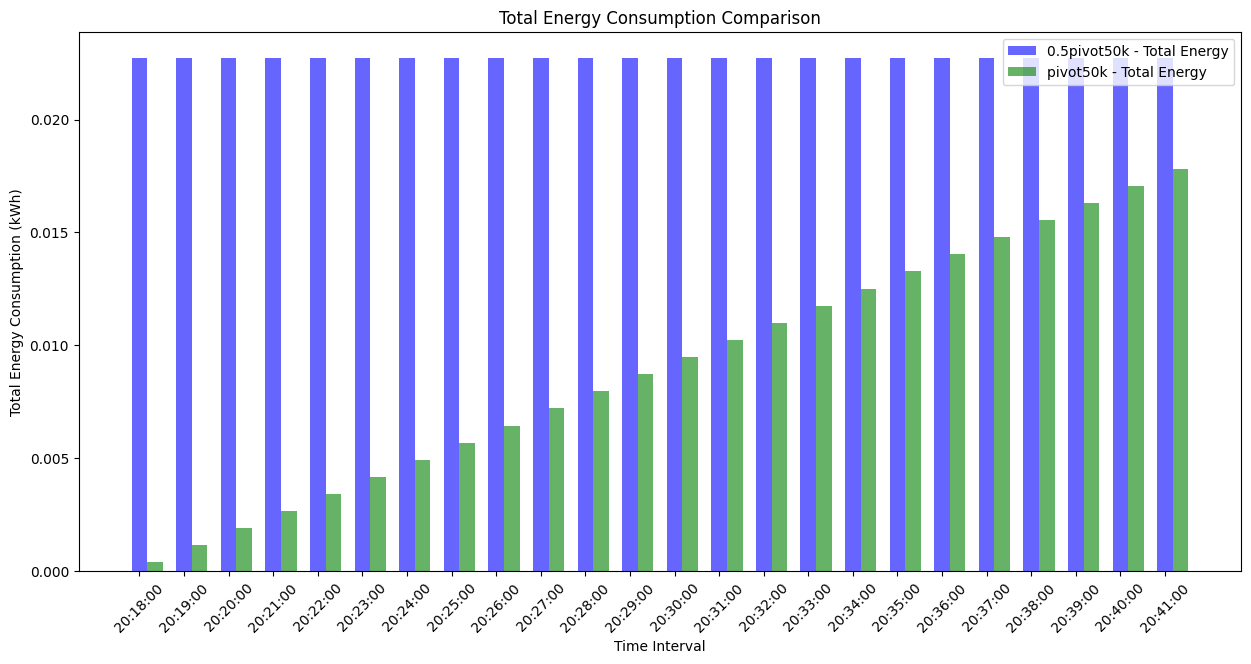

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import re

def load_and_prepare_data(file_path):
    # Load data
    with open(file_path, 'r') as file:
        log_data = file.read()

    # Extract relevant data using regular expressions
    pattern = r'\[codecarbon INFO @ (\d{2}:\d{2}:\d{2})\] Energy consumed for RAM : ([\d\.]+) kWh. RAM Power : ([\d\.]+) W\n\[codecarbon INFO @ \d{2}:\d{2}:\d{2}\] Energy consumed for all CPUs : ([\d\.]+) kWh. Total CPU Power : ([\d\.]+) W'
    matches = re.findall(pattern, log_data)

    # Convert to DataFrame
    df = pd.DataFrame(matches, columns=['Time', 'Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W'])
    df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']] = df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']].astype(float)
    
    # Convert 'Time' to datetime
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
    
    return df

# Load and prepare data for both files
df_05 = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/0.5pivot50k.txt') 
df_new = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/pivot50k.txt')    

# Calculating the total cumulative energy (RAM + CPU) for both files
df_05['Total_Energy_kWh'] = df_05['Energy_RAM_kWh'] + df_05['Energy_CPU_kWh']
df_new['Total_Energy_kWh'] = df_new['Energy_RAM_kWh'] + df_new['Energy_CPU_kWh']

# Aggregating data into equal time intervals
df_05['Time_Interval'] = df_05['Time'].dt.round('min')
df_new['Time_Interval'] = df_new['Time'].dt.round('min')
agg_05 = df_05.groupby('Time_Interval')['Total_Energy_kWh'].max()
agg_new = df_new.groupby('Time_Interval')['Total_Energy_kWh'].max()

# Merging the datasets for comparison
comparison_df = pd.merge(agg_05, agg_new, left_index=True, right_index=True, how='outer', suffixes=('_0.5pivot50k', '_pivot50k'))
comparison_df = comparison_df.ffill()  # Using ffill() directly

# Resetting index to keep 'Time_Interval' as a column
comparison_df.reset_index(inplace=True)

# Selecting common time intervals for comparison
common_intervals = comparison_df.dropna()

# Create numerical indexes for the x-axis
x_indexes = range(len(common_intervals))

# Creating the stacked bar chart with numerical indexes for the x-axis
plt.figure(figsize=(15, 7))
bar_width = 0.35

plt.bar(x_indexes, common_intervals['Total_Energy_kWh_0.5pivot50k'], label='0.5pivot50k - Total Energy', width=bar_width, color='blue', alpha=0.6)
plt.bar([x + bar_width for x in x_indexes], common_intervals['Total_Energy_kWh_pivot50k'], label='0.7pivot50k - Total Energy', width=bar_width, color='green', alpha=0.6)

# Set x-axis tick labels to be the time intervals
plt.xticks(x_indexes, common_intervals['Time_Interval'].dt.time, rotation=45)

plt.title('Total Energy Consumption Comparison')
plt.xlabel('Time Interval')
plt.ylabel('Total Energy Consumption (kWh)')
plt.legend()
plt.show()


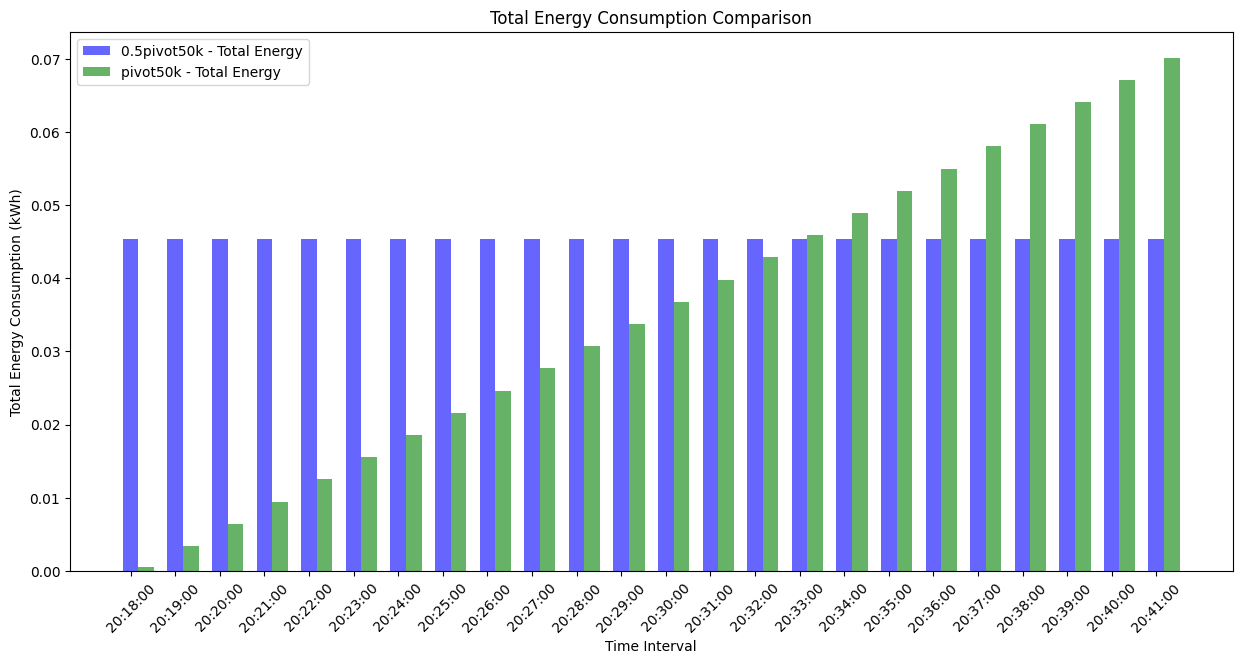

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import re

def load_and_prepare_data(file_path):
    # Load data
    with open(file_path, 'r') as file:
        log_data = file.read()

    # Extract relevant data using regular expressions
    pattern = r'\[codecarbon INFO @ (\d{2}:\d{2}:\d{2})\] Energy consumed for RAM : ([\d\.]+) kWh. RAM Power : ([\d\.]+) W\n\[codecarbon INFO @ \d{2}:\d{2}:\d{2}\] Energy consumed for all CPUs : ([\d\.]+) kWh. Total CPU Power : ([\d\.]+) W'
    matches = re.findall(pattern, log_data)

    # Convert to DataFrame
    df = pd.DataFrame(matches, columns=['Time', 'Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W'])
    df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']] = df[['Energy_RAM_kWh', 'RAM_Power_W', 'Energy_CPU_kWh', 'CPU_Power_W']].astype(float)
    
    # Convert 'Time' to datetime
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
    
    return df

# Load and prepare data for both files
df_05 = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/0.5pivot50k.txt') 
df_new = load_and_prepare_data('C:/Users/pc/Desktop/visual (2)/visual/algos/pivot50k.txt')    

# Calculating the total cumulative energy (RAM + CPU) for both files
df_05['Total_Energy_kWh'] = df_05['Energy_RAM_kWh'] + df_05['Energy_CPU_kWh']
df_new['Total_Energy_kWh'] = df_new['Energy_RAM_kWh'] + df_new['Energy_CPU_kWh']

# Aggregating data into equal time intervals and calculating the sum of energy consumption
df_05['Time_Interval'] = df_05['Time'].dt.round('min')
df_new['Time_Interval'] = df_new['Time'].dt.round('min')
agg_05 = df_05.groupby('Time_Interval')['Total_Energy_kWh'].sum()  
agg_new = df_new.groupby('Time_Interval')['Total_Energy_kWh'].sum()  # Sum instead of max

# Merging the datasets for comparison
comparison_df = pd.merge(agg_05, agg_new, left_index=True, right_index=True, how='outer', suffixes=('_0.5pivot50k', '_pivot50k'))
comparison_df = comparison_df.ffill()  # Using ffill() directly

# Resetting index to keep 'Time_Interval' as a column
comparison_df.reset_index(inplace=True)

# Selecting common time intervals for comparison
common_intervals = comparison_df.dropna()

# Create numerical indexes for the x-axis
x_indexes = range(len(common_intervals))

# Creating the stacked bar chart with numerical indexes for the x-axis
plt.figure(figsize=(15, 7))
bar_width = 0.35

plt.bar(x_indexes, common_intervals['Total_Energy_kWh_0.5pivot50k'], label='0.5pivot50k - Total Energy', width=bar_width, color='blue', alpha=0.6)
plt.bar([x + bar_width for x in x_indexes], common_intervals['Total_Energy_kWh_pivot50k'], label='pivot50k - Total Energy', width=bar_width, color='green', alpha=0.6)

# Set x-axis tick labels to be the time intervals
plt.xticks(x_indexes, common_intervals['Time_Interval'].dt.time, rotation=45)

plt.title('Total Energy Consumption Comparison')
plt.xlabel('Time Interval')
plt.ylabel('Total Energy Consumption (kWh)')
plt.legend()
plt.show()


In [57]:
df_new

Time  Energy_RAM_kWh  RAM_Power_W  Energy_CPU_kWh  \
0  1900-01-01 20:18:07        0.000012     2.957967        0.000177   
1  1900-01-01 20:18:22        0.000025     2.957967        0.000355   
2  1900-01-01 20:18:37        0.000037     2.957967        0.000532   
3  1900-01-01 20:18:52        0.000049     2.957967        0.000709   
4  1900-01-01 20:19:07        0.000062     2.957967        0.000886   
..                 ...             ...          ...             ...   
89 1900-01-01 20:40:24        0.001110     2.957967        0.015951   
90 1900-01-01 20:40:39        0.001122     2.957967        0.016129   
91 1900-01-01 20:40:54        0.001134     2.957967        0.016306   
92 1900-01-01 20:41:09        0.001147     2.957967        0.016483   
93 1900-01-01 20:41:24        0.001159     2.957967        0.016660   

    CPU_Power_W  Total_Energy_kWh       Time_Interval  
0          42.5          0.000189 1900-01-01 20:18:00  
1          42.5          0.000380 1900-01-01 20:18:00  
2          42.5          0.000569 1900-01-01 20:19:00  
3          42.5          0.000758 1900-01-01 20:19:00  
4          42.5          0.000948 1900-01-01 20:19:00  
..          ...               ...                 ...  
89         42.5          0.017061 1900-01-01 20:40:00  
90         42.5          0.017251 1900-01-01 20:41:00  
91         42.5          0.017440 1900-01-01 20:41:00  
92         42.5          0.017630 1900-01-01 20:41:00  
93         42.5          0.017819 1900-01-01 20:41:00  

[94 rows x 7 columns]

In [58]:
df_05

Time  Energy_RAM_kWh  RAM_Power_W  Energy_CPU_kWh  \
0   1900-01-01 18:37:03        0.000012     2.957967        0.000178   
1   1900-01-01 18:37:18        0.000025     2.957967        0.000355   
2   1900-01-01 18:37:33        0.000037     2.957967        0.000532   
3   1900-01-01 18:37:48        0.000049     2.957967        0.000710   
4   1900-01-01 18:38:03        0.000062     2.957967        0.000887   
..                  ...             ...          ...             ...   
115 1900-01-01 19:05:50        0.001430     2.957967        0.020554   
116 1900-01-01 19:06:05        0.001442     2.957967        0.020731   
117 1900-01-01 19:06:20        0.001454     2.957967        0.020908   
118 1900-01-01 19:06:35        0.001467     2.957967        0.021085   
119 1900-01-01 19:06:50        0.001479     2.957967        0.021262   

     CPU_Power_W  Total_Energy_kWh       Time_Interval  
0           42.5          0.000190 1900-01-01 18:37:00  
1           42.5          0.000380 1900-01-01 18:37:00  
2           42.5          0.000569 1900-01-01 18:38:00  
3           42.5          0.000759 1900-01-01 18:38:00  
4           42.5          0.000949 1900-01-01 18:38:00  
..           ...               ...                 ...  
115         42.5          0.021984 1900-01-01 19:06:00  
116         42.5          0.022173 1900-01-01 19:06:00  
117         42.5          0.022362 1900-01-01 19:06:00  
118         42.5          0.022552 1900-01-01 19:07:00  
119         42.5          0.022741 1900-01-01 19:07:00  

[120 rows x 7 columns]

In [56]:
import pandas as pd

# Assuming you have already loaded and prepared the data into two DataFrames: df_05 and df_new

# Calculate total energy consumption for each DataFrame
total_energy_05 = df_05['Total_Energy_kWh'].sum()
total_energy_new = df_new['Total_Energy_kWh'].sum()

# Calculate the difference in consumption
consumption_difference = total_energy_new - total_energy_05

# Print the results
print(f'Total Energy Consumption for 0.5pivot50k: {total_energy_05} kWh')
print(f'Total Energy Consumption for pivot50k: {total_energy_new} kWh')
print(f'Difference in Consumption: {consumption_difference} kWh')


Total Energy Consumption for 0.5pivot50k: 1.375909 kWh
Total Energy Consumption for pivot50k: 0.8463790000000001 kWh
Difference in Consumption: -0.52953 kWh


In [ ]:
python -m venv venv